A collection of python tools for astronomical image analysis. <br>
By Geferson Lucatelli

Objectives:
1. Basic image manipulation and plotting.
2. Characterize the radio emission of radio maps.
3. Perform image analysis to extract relevant physical properties.

Basically, this notebook contains:

    1. Plotting capabilities
    2. Signal processing / Image analysis (non-parametric)
    3. Source Extraction
    5. Others

Multiple libraries, functions, etc, are placed in the library file `libs/libs.py`. The module `morphen.py` helps to deal with different kinds of tasks. You can run it on a notebook or as a `CLI`. 

Index:

1. [Introduction/Imports](#imports) <br>
2. [Data Manipulation](#data_manipulation) <br>
    2.1 [Preparing Images](#preparing_images) <br>
    2.2 [Masking](#masking) <br>
3. [Source Extraction](#source_extraction) <br>

<a id='imports'></a>

```
 _           ___                            _       
/ |         |_ _|_ __ ___  _ __   ___  _ __| |_ ___ 
| |  _____   | || '_ ` _ \| '_ \ / _ \| '__| __/ __|
| | |_____|  | || | | | | | |_) | (_) | |  | |_\__ \
|_|         |___|_| |_| |_| .__/ \___/|_|   \__|___/
                          |_|                      
```

<a id='imports'></a>
# Importing required libraries. 

In [1]:
import sys
sys.path.append('../libs/')
sys.path.append('../')
import morphen as mp
import libs as mlibs
import numpy as np




                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
   Radio Morphen              |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _+;]@.
                                                 _/_             |]\|    .  _
                                              ...._@* __ .

Note now that we can use existing imported packages from `libs.py` as `mlibs.np`, etc..

In [2]:
mlibs.np.__version__

'1.24.4'

In [3]:
mp.__version__

'0.3.1b'

<a id='data_manipulation'></a>

```
 ____            ____        _
|___ \          |  _ \  __ _| |_ __ _
  __) |  _____  | | | |/ _` | __/ _` |
 / __/  |_____| | |_| | (_| | || (_| |
|_____|         |____/ \__,_|\__\__,_|

 __  __             _             _       _   _             
|  \/  | __ _ _ __ (_)_ __  _   _| | __ _| |_(_) ___  _ __  
| |\/| |/ _` | '_ \| | '_ \| | | | |/ _` | __| |/ _ \| '_ \ 
| |  | | (_| | | | | | |_) | |_| | | (_| | |_| | (_) | | | |
|_|  |_|\__,_|_| |_|_| .__/ \__,_|_|\__,_|\__|_|\___/|_| |_|
                     |_|                                    

````

## Listing Imaging Data

The way you read data (`.fits` or `CASA` images) is up to you, but here we provide a simple interface through `morphen` to easily read `.fits` files.

For this notebook, we are going to use a set of example data, that can be found in this repository: https://github.com/lucatelli/data_examples
For that, clone the entire repo. 
<!-- 
Additionally, the same data can be found in this link: 
()

```
import os
os.system('wget ()')
os.system('tar -xvf data_examples.tar.xz')
```

<br> -->

With this data, you can experiment with the general usage of `morphen`. 

In [4]:
# First, define the path to the data.
root_path = '../../data_examples/data_examples_general/vla_only/UGC5101_X/'

In [5]:
#To easily list files in a directory, use the glob module, setting a prefix of your images.
# In this example, images produced by WSClean have the prefix '-MFS-image.fits'
prefix_images = '*MFS-image.fits'

In [6]:
imagelist = mlibs.glob.glob(root_path+prefix_images)


In [7]:
imagelist

['../../data_examples/data_examples_general/vla_only/UGC5101_X/selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..0.5-MFS-image.fits',
 '../../data_examples/data_examples_general/vla_only/UGC5101_X/selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-image.fits']

### Sorting a list of images by beam-size. 

Sometimes, it is convenient to sort the radio images according to the size of the restoring beam. This function will also return the associated residual images if they exist at the same directory. If the directory structure is the same as indicated previously, that will be done automatically. If not, you must provide the associated list or residual maps. You must ensure that the id of each image will correspond to the residuals.  

Residual images are important to get error estimates for flux densities, and for modelling the background noise.

In [8]:
mlibs.sort_list_by_beam_size??

In [9]:
imagelist,residuallist = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist,
                                 return_df = False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 84.27it/s]

0 >> selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..0.5-MFS-image.fits
1 >> selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-image.fits


In [10]:
residuallist

array(['../../data_examples/data_examples_general/vla_only/UGC5101_X/selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..0.5-MFS-residual.fits',
       '../../data_examples/data_examples_general/vla_only/UGC5101_X/selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-residual.fits'],
      dtype=object)

Now, we can use the function `mp.read_data` to read the data the data.


In [11]:
# lets select one image from our list of images. 
idx = -1 #select one index from the list. 
input_data=mp.read_data(filename=imagelist[idx],
                        residualname=residuallist[idx])

++>> Image File: selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-image.fits
++>> Residual File: selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-residual.fits
-->> No PSF File was provided.


In [12]:
# input_data??

In [13]:
#Some basic information cab be obtained from `input_data` object.
#2D numpy array of the source image
input_data.image_data_2D

array([[ 3.02492890e-06,  3.17884712e-07, -2.60909928e-06, ...,
        -4.35704897e-06, -6.60618980e-06, -7.34033665e-06],
       [ 5.43647684e-06,  4.45252681e-06,  3.11180679e-06, ...,
        -6.45954151e-06, -7.37405571e-06, -5.72745375e-06],
       [ 6.54576706e-06,  7.49127048e-06,  7.89675596e-06, ...,
        -6.01709007e-06, -5.43050692e-06, -2.27464398e-06],
       ...,
       [-9.56238000e-06, -8.10077381e-06, -5.80174446e-06, ...,
        -5.42785529e-06, -4.71634939e-06, -5.75049580e-06],
       [-1.13677434e-05, -1.04898727e-05, -8.53862184e-06, ...,
        -8.91438685e-06, -6.58776798e-06, -5.22190976e-06],
       [-1.15884286e-05, -1.07414480e-05, -9.27955534e-06, ...,
        -1.32532987e-05, -9.38525864e-06, -5.71169903e-06]])

In [14]:
#2D numpy array of the residual image
input_data.residual_data_2D

array([[ 3.02496960e-06,  3.17923195e-07, -2.60906472e-06, ...,
        -4.35701440e-06, -6.60615115e-06, -7.34029572e-06],
       [ 5.43649776e-06,  4.45254636e-06,  3.11182475e-06, ...,
        -6.45952105e-06, -7.37403388e-06, -5.72743193e-06],
       [ 6.54579890e-06,  7.49130140e-06,  7.89678688e-06, ...,
        -6.01705688e-06, -5.43047327e-06, -2.27461123e-06],
       ...,
       [-9.56237363e-06, -8.10076745e-06, -5.80173901e-06, ...,
        -5.42785301e-06, -4.71634530e-06, -5.75049035e-06],
       [-1.13677324e-05, -1.04898627e-05, -8.53861275e-06, ...,
        -8.91437503e-06, -6.58775662e-06, -5.22189839e-06],
       [-1.15884122e-05, -1.07414317e-05, -9.27953897e-06, ...,
        -1.32532832e-05, -9.38524227e-06, -5.71168312e-06]])

In [15]:
# MAD std of the residual image
input_data.rms_img

6.751820729028619e-06

In [16]:
#we then can set
image_data = input_data.image_data_2D
residual_data = input_data.residual_data_2D

For general access of the images, you can also use the function `mlibs.ctn`.
Its original name means Casa>To>Numpy, but it is a general function to load data into `numpy`` arrays. 

In [17]:
mlibs.ctn??

#### Ploting the radio map
To facilitate our lives, the function `mlibs.eimshow` is an enhanced version 
of `plt.imshow` that allows us to plot radio images with the correct axis, proper scaling, contours, etc. 
It was tested at some extent, and the default parameters works pretty well for radio maps.

You can input a file name, or a numpy array.
But, to properly plot the data with correct `wcs` projection, you can provide the filename itself, not the data. 


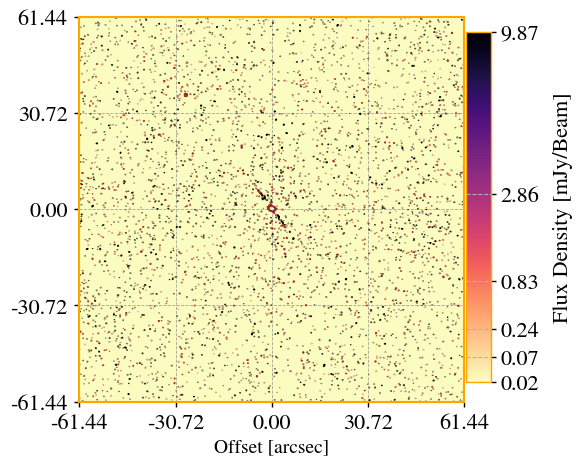

In [18]:
ax=mlibs.eimshow(input_data.filename)

##### Image too large to see the structure of the radio source? 
You can easily crop the image.

  >> Center -->  [1536 1541    0    0]


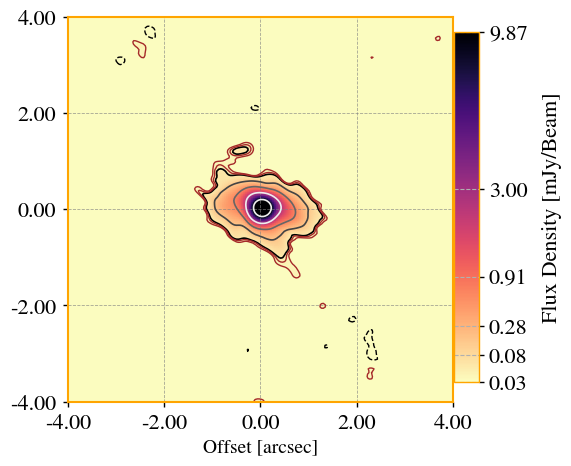

In [19]:
ax=mlibs.eimshow(input_data.filename, 
                 crop=True,box_size=(100),
                 center=None)

Input image is not a string.
Input image is not a string.


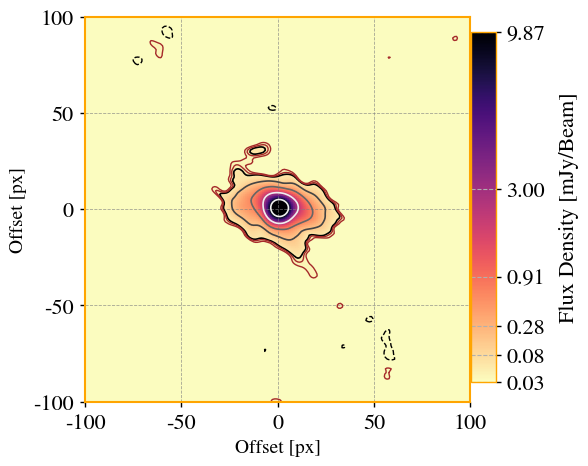

In [20]:
#or also just the data as a numpy array. Axes projection will be pixels. 
ax=mlibs.eimshow(image_data,
                        crop=True,
                        box_size=(100),
                        center=None)


##### There are other several options to customize the plot.

  >> Center -->  [1536 1541    0    0]


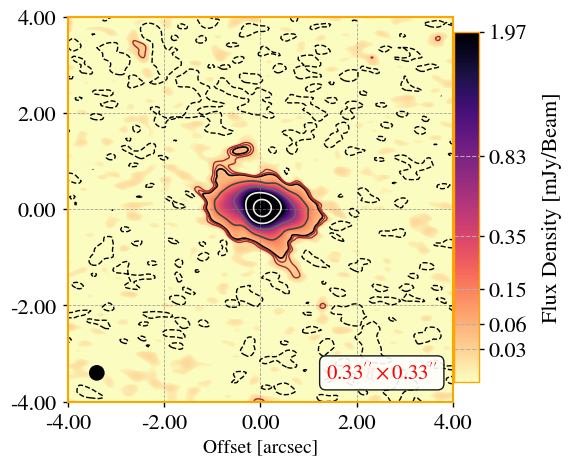

In [21]:
ax=mlibs.eimshow(input_data.filename,
                 add_beam=True,
                 crop=True,box_size=(100),
                 vmin_factor=1.0,vmax_factor=0.1, #level factor (max from peak, and min from std)
                 neg_levels=mlibs.np.asarray([-1]), # negative contours to draw -- which negative std level?
                 CM='magma_r',
       )

  >> Center -->  [1536 1541    0    0]


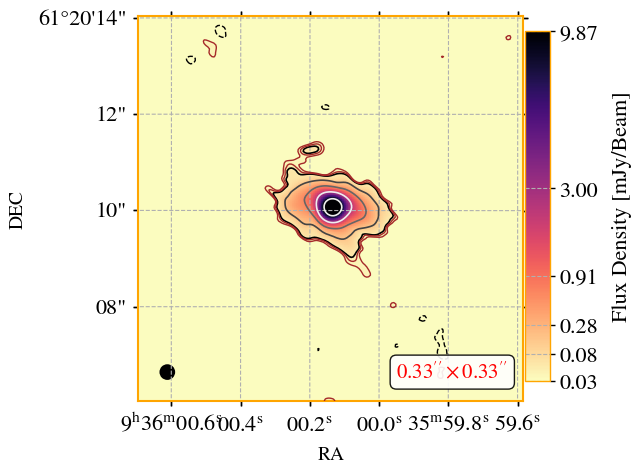

In [22]:
#change the projection of the image.
ax=mlibs.eimshow(input_data.filename,
                 add_beam=True,
                 crop=True,box_size=(100),
                 projection='celestial'
       )

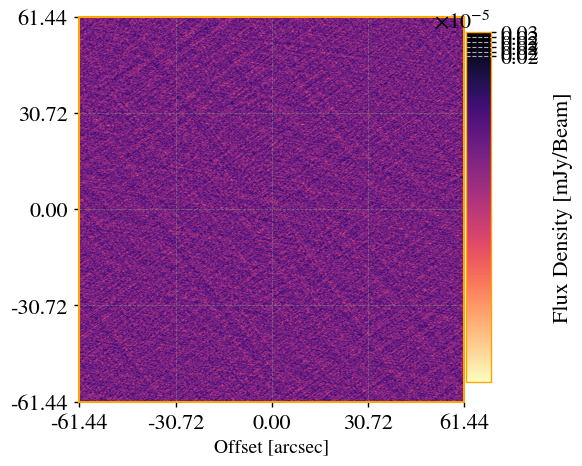

In [23]:
#checking the residual map.
ax=mlibs.eimshow(input_data.residualname,
        vmin_factor=-3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        CM='magma_r',add_contours=False # remove contours
       )

### Using the residual map to compute the rms background level. 
If the zoom-in is not computing the rms value properly, you can provide it 
(e.g. use the residual rms):

  >> Center -->  [1536 1541    0    0]


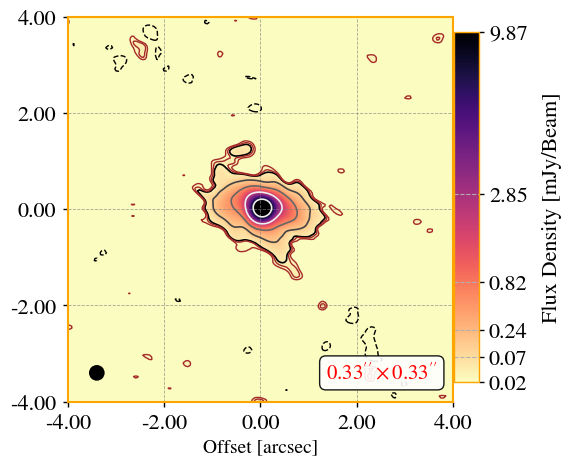

In [24]:
rms = input_data.rms_res

ax=mlibs.eimshow(input_data.filename, rms=rms,
                 vmin_factor=3.0,vmax_factor=0.5, #level factor (max from peak, and min from std)
                 neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
                 CM='magma_r',crop=True,box_size=(100), # in pixels
                 add_beam=True,
       )

### Add a scale bar in physical units
If you provide at which redshift the source is located, you can also add a scale bar using
`astropy.units` module.

  >> Center -->  [1536 1541    0    0]


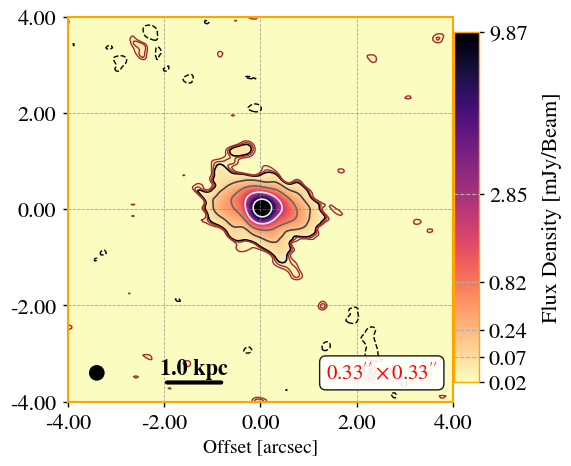

In [25]:
#If you provide at which redshift the source is located, you can also add a scale bar using
# astropy.units module.
ax=mlibs.eimshow(input_data.filename,
                 add_beam=True,
                 rms=rms,
                 crop=True,box_size=(100),
                 vmin_factor=3.0,vmax_factor=0.5, #level factor (max from peak, and min from std)
                 neg_levels=mlibs.np.asarray([-3]), # negative contours to draw -- which negative std level?
                 CM='magma_r',
                 source_distance=mlibs.find_z_NED('UGC5101'), #in z
                 scalebar_length = 1.0*mlibs.u.kpc
       )

Plot can be saved simply by passing the argument `save_name`.

In [27]:
input_data.filename.replace('.fits','_my_radio_map')

'../../data_examples/data_examples_general/vla_only/UGC5101_X/selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-image_my_radio_map'

  >> Center -->  [1536 1541    0    0]


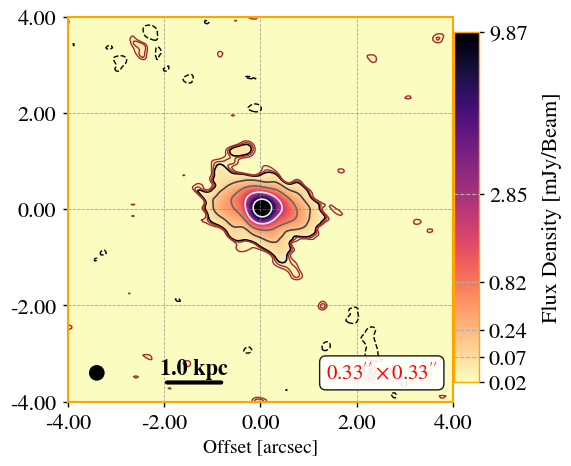

In [26]:

#If you provide at which redshift the source is located, you can also add a scale bar using
# astropy.units module.
ax=mlibs.eimshow(input_data.filename,
                 add_beam=True,
                 rms=rms,
                 crop=True,box_size=(100),
                 vmin_factor=3.0,vmax_factor=0.5, #level factor (max from peak, and min from std)
                 neg_levels=mlibs.np.asarray([-3]), # negative contours to draw -- which negative std level?
                 CM='magma_r',
                 source_distance=mlibs.find_z_NED('UGC5101'), #in z
                 scalebar_length = 1.0*mlibs.u.kpc,
                 save_name=input_data.filename.replace('.fits','_my_radio_map')
       )

## Perform Image Cutouts
If the emission is too small compared to the image size, you can perform a cutout of the image witha `cutout_size` using the function 
`mlibs.cutout_2D_radec`. 


++>> Image File: selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..0.5-MFS-image.fits
++>> Residual File: selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..0.5-MFS-residual.fits
-->> No PSF File was provided.
  >> Center -->  [1536 1541    0    0]


[1536 1541    0    0]
09:35:51.600, +61.21.11.700, 9.999e+09Hz, I
143.96499999999997 61.35325


<Axes: xlabel='Offset [arcsec]'>

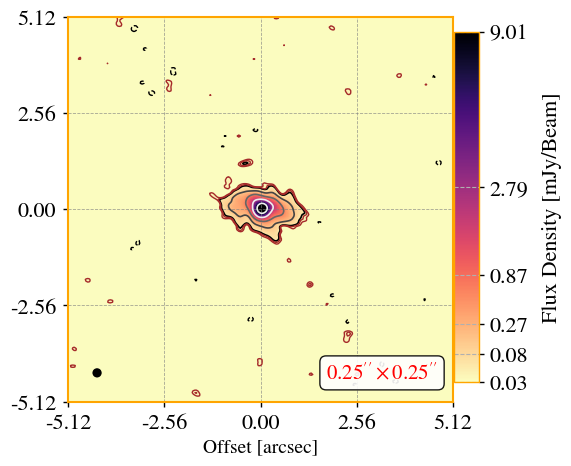

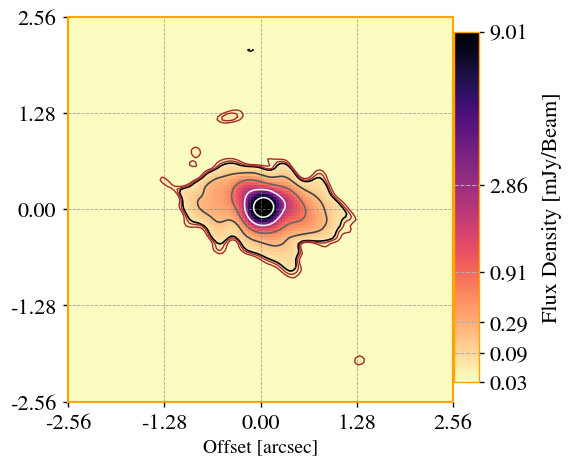

In [117]:
# lets select another image from our list of images. 
idx = 0#select one index from the list. 
input_data=mp.read_data(filename=imagelist[idx],
                        residualname=residuallist[idx])
ax=mlibs.eimshow(input_data.filename,crop=True,box_size=128,add_beam=True)
cutout_size = 128
ra,dec,new_filename = mlibs.cutout_2D_radec(imagename=input_data.filename,
                                            residualname=input_data.residualname,
                                            cutout_size = cutout_size,
                                            special_name='')
mlibs.eimshow(new_filename)

If you have multiple images for the same source, you can use the coordinates from the previous run to cut all the images at the same position.

In [118]:
imagelist_c = []
residuallist_c = []
for i in mlibs.tqdm(range(len(imagelist))):
    _,_,image_c = mlibs.cutout_2D_radec(imagename=imagelist[i],
                                            residualname=residuallist[i],
                                            ra_f=ra,dec_f=dec,
                                            cutout_size = cutout_size,
                                            special_name='')
    imagelist_c.append(image_c)
    residuallist_c.append(image_c.replace('-image.cutout.fits','-residual.cutout.fits'))

100%|██████████| 2/2 [00:00<00:00, 56.20it/s]


In [119]:
imagelist_c

['../../data_examples/data_examples_general/vla_only/UGC5101_X/selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..0.5-MFS-image.cutout.fits',
 '../../data_examples/data_examples_general/vla_only/UGC5101_X/selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-image.cutout.fits']

In [120]:
residuallist_c

['../../data_examples/data_examples_general/vla_only/UGC5101_X/selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..0.5-MFS-residual.cutout.fits',
 '../../data_examples/data_examples_general/vla_only/UGC5101_X/selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-residual.cutout.fits']

<a id='image_analysis'></a>

```
 _____           ___                            
|___ /          |_ _|_ __ ___   __ _  __ _  ___ 
  |_ \   _____   | || '_ ` _ \ / _` |/ _` |/ _ \
 ___) | |_____|  | || | | | | | (_| | (_| |  __/
|____/          |___|_| |_| |_|\__,_|\__, |\___|
                                     |___/      
    _                _           _     
   / \   _ __   __ _| |_   _ ___(_)___ 
  / _ \ | '_ \ / _` | | | | / __| / __|
 / ___ \| | | | (_| | | |_| \__ \ \__ \
/_/   \_\_| |_|\__,_|_|\__, |___/_|___/
                       |___/
```

# Basic Image Analysis

Bellow, we provide some details of how to perform basic image analysis, such as:
1. Compute the total integrated flux density from a radio map.
2. Calculate associated uncertainties and the rms of the backgroud.
3. Compute the peak brightness intensity. 
4. Estimate the approximated sizes and areas of the radio emission.
5. Perform a simple source extraction for structural separation.
5. etc
   

Be aware that these functions are in current development and undergoing improvements. If you would like to request some kind of particular analysis, suggest modifications, contribute, point out issues, etc, feel free to contact us or open a new git issue.

## Some functions
Standard tasks that are available and needed to extract properties from images are listed below. 

### Masking
Masking is critical to obtain accurate information of the emission structure and its total integrated flux density. 
In here, we use a conservative threshold based on the median absolute deviation (`mad`), where we use `6 sigma_mad` and from that apply a mask dilation to recover the fainter emission surrounding it. 

You can set another threshold values as well (check examples below).

Relevant arguments:
- `sigma` : median absolute deviation threshold limit, discard intensities lower than that. Default is `6`
- `dilation_size` : The size of the dilation of the mask. Default is `None`, which uses the size of the restoring beam from the header of the interferometric image. This choice is suitable.
- `iterations` : Number of iterations to perform the mask dilation. Default is `2`. Using `dilation_size=None`  and `iterations=2` yields good results. 
- `rms` : the reference rms background level, in which `threshold = rms * sigma`. If `rms=None`, it will be estimated from the image. Note, however, that if there are not enough sampling data points for the background, `rms` will be overestimated. In that case, you need to provide a proper `rms` value, using the residual map (like mentioned before while plotting the images).

Note: Using the default options for the `dilation_size = None` (i.e. beam size) and `iterations=2`, has proved effective for both VLA and e-MERLIN images.

In [121]:
# lets select another image from our list of images. 
idx = -1#select one index from the list. 
input_data=mp.read_data(filename=imagelist_c[idx],
                        residualname=residuallist_c[idx])

++>> Image File: selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-image.cutout.fits
++>> Residual File: selfcal_image_UGC05101.calibrated.avg12s_trial_1_3072x3072_0.04asec_100000.briggs.multiscale..1.0-MFS-residual.cutout.fits
-->> No PSF File was provided.


In [122]:
# mlibs.mask_dilation??

 ==>  Dilation size is 4 [px]


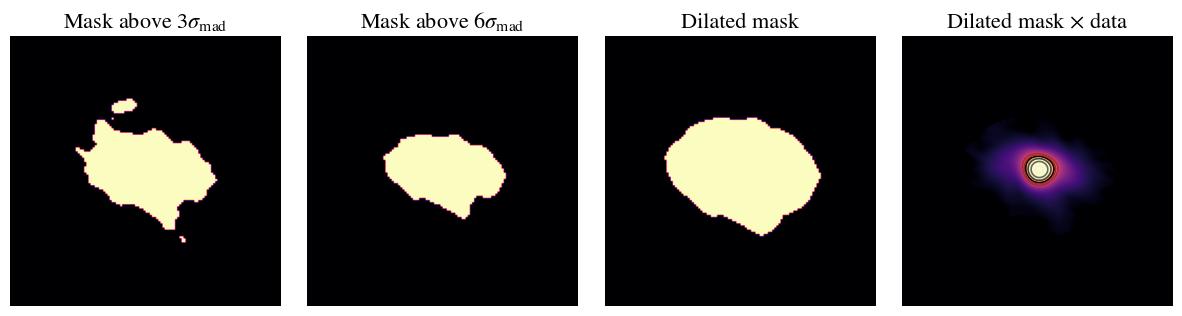

In [123]:
#default options
mask = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=6,dilation_size=None)

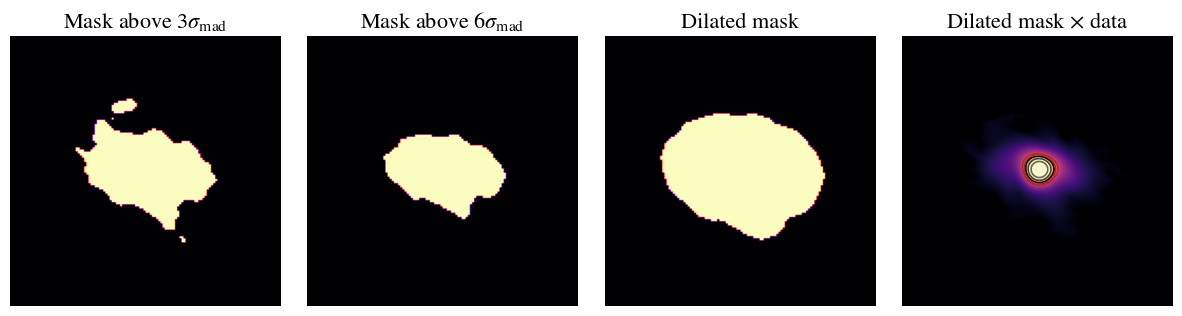

In [124]:
#keeping the threshold, but incresing the dillation size. 
_ = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=6,dilation_size=5)

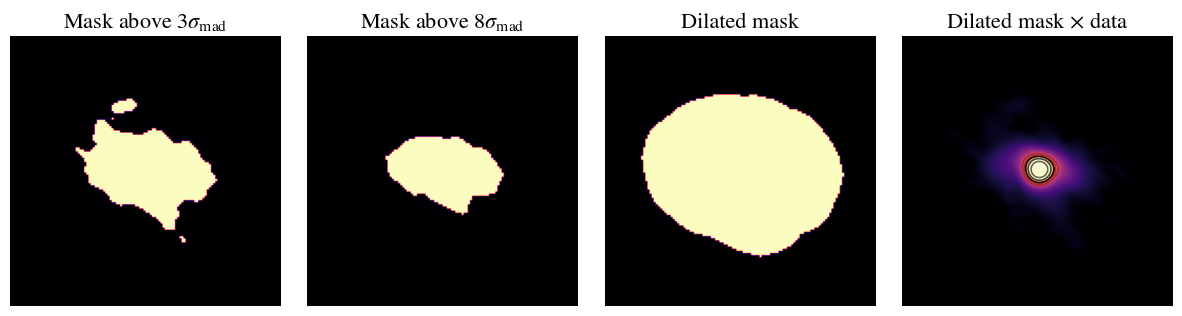

In [125]:
_ = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=8,dilation_size=10)

 ==>  Dilation size is 4 [px]


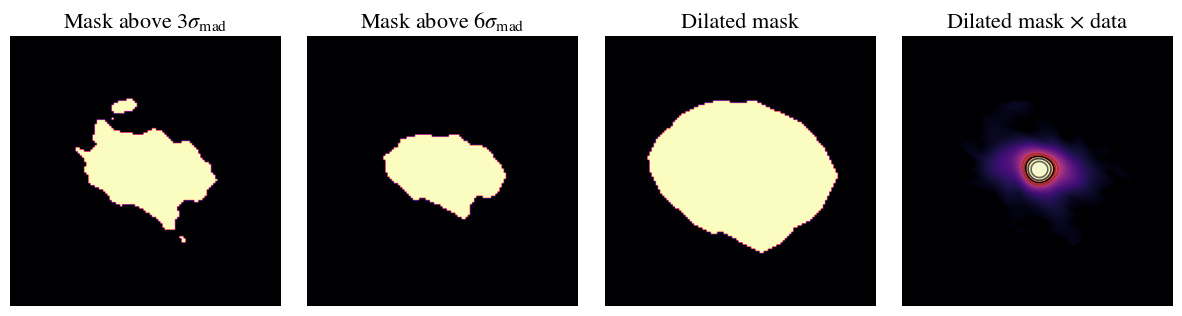

In [126]:
_ = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=6,dilation_size=None,iterations=4)

 ==>  Dilation size is 4 [px]


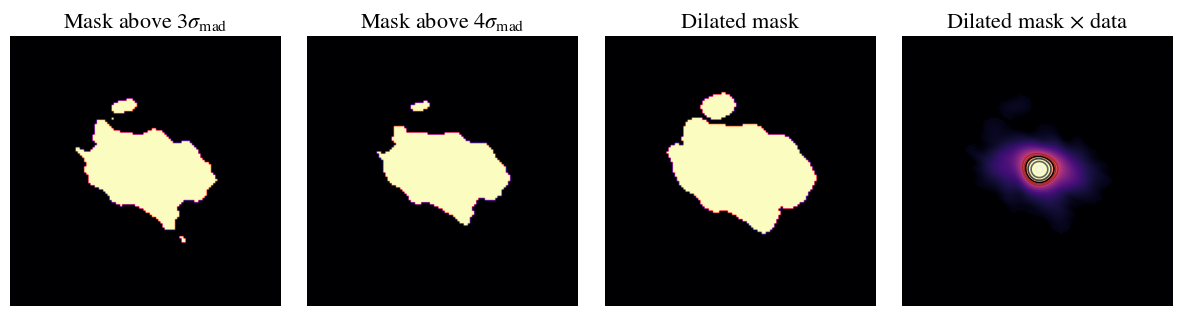

In [127]:
mask = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=4,dilation_size=None,iterations=1)


### `level_statistics()`
Function to compute basic image statistics, such as total flux density and uncertain flux. 

It splits the range of image intensity values in four distinct regions:

1. Inner region: intensities/fluxes within `[peak intensity, 0.1 * peak intensity]`
2. Mid region: intensities/fluxes within `[0.1 * peak intensity, 10 * rms]`
3. Low region: intensities/fluxes within `[10 * rms, 6 * rms]`
4. Uncertain region: intensities/fluxes within `[6 * rms, 3 * rms]`
    
The flux uncertainty using this approach is computed as being the flux from $6 \times \sigma_{\rm mad}$ to $3 \times \sigma_{\rm mad}$.

Note that you do not necessarily have to provide the dilated mask computed previously. It is calculated inside the function, using the default arguments. However, you can change the arguments accordingly, or provide the mask as well, with the `mask` argument. 

In [128]:
# mlibs.level_statistics??

In [129]:
level_stats = mlibs.level_statistics(img=input_data.filename,
                                     mask=None)

 ==>  Dilation size is 4 [px]


In [130]:
f"{level_stats['total_flux']*1000:.2f}+/-{level_stats['uncertain_flux']*1000:.2f}mJy"

'31.50+/-0.23mJy'

### 3.1.3 - Image Shape Analysis
Now, we can calculate global properties of the radio emission, for example:
 - Total integrated flux density
 - Peak brightness
 - Flux density uncertainty
 - Half-light radius $R_{50}$
 - Orientation $PA$
 - Axis ratio $q$

In [131]:
# mlibs.compute_image_properties??

 ==>  Dilation size is 4 [px]
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 31.66 +/- 0.28 mJy
Fractional error = 0.01
Flux Density and error (quadrature total): 
Flux Density = 31.66 +/- 1.58 mJy
Fractional error = 0.05
-----------------------------------------------------------------
16 64 48


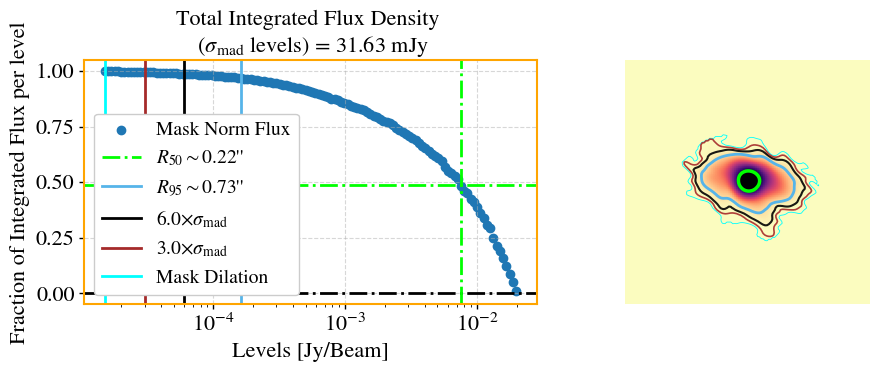

In [132]:
image_measures = mlibs.compute_image_properties(input_data.filename,
                                                input_data.residualname,
                                                # rms=input_data.rms_res,
                                                last_level=1.5)

Optional Arguments: 
 - `last_level=1` means that almost all emission inside the dilated mask should be used in the computation. If using, for example `last_level=3`, a new threshold is calculated inside the masked region, above `3 sigma mad`. If you are using the mask dilation with a conservative threshold, it is 'safe' to use `last_level=1`. 

### All together: The class `radio_image_analysis`

In `morphen.py`, the class `radio_image_analysis` is designed to contain the function calls from the library files within `libs`, which it is practical to perform all the calculations we are interested. 

All possible modifications can be done and calculations of interest can be appended. 

Note: For now, just one function is used, `measures`, from `libs/libs.py`. This function contains relevant routines to quantify properties from radio images.
More features will be added in the future.


In [133]:
# mp.radio_image_analysis??

In [134]:
# mlibs.measures??

In [135]:
import libs as mlibs
from importlib import reload
reload(mlibs)


                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
   Radio Morphen              |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _+;]@.
                                                 _/_             |]\|    .  _
                                              ...._@* __ .

<module 'libs' from '/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py'>

2024-03-13 07:19:41 - INFO - Computing image level statistics.
2024-03-13 07:19:41 - WARNING - The redshift of the source was not specified.Conversions to physical units will not be performed.
2024-03-13 07:19:41 - INFO -   CALC >> Performing mask dilation.


 ==>  Dilation size is 4 [px]


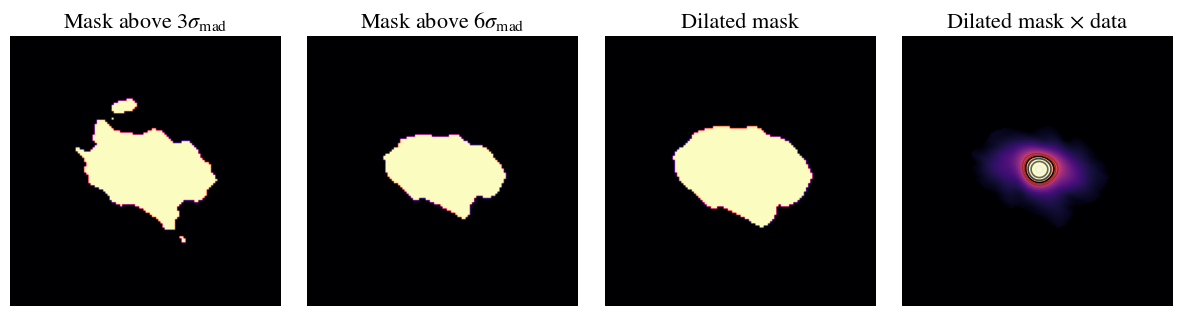

2024-03-13 07:19:41 - INFO -   CALC >> Performing level statistics.
2024-03-13 07:19:41 - INFO -   CALC >> Computing image properties.
2024-03-13 07:19:42 - INFO - +---------------------------+
2024-03-13 07:19:42 - INFO - | Basic Source Properties |
2024-03-13 07:19:42 - INFO - +---------------------------+
2024-03-13 07:19:42 - DEBUG -  ==>  Peak of Flux=19.74 [mJy/beam]
2024-03-13 07:19:42 - DEBUG -  ==>  Total Flux Inside Mask='31.55 [mJy]
2024-03-13 07:19:42 - DEBUG -  ==>  Total Flux Image=31.66 [mJy]
2024-03-13 07:19:42 - DEBUG -  ==>  Half-Light Radii=5.38 [px]
2024-03-13 07:19:42 - DEBUG -  ==>  Total Source Size=17.69 [px]
2024-03-13 07:19:42 - DEBUG -  ==>  Source Global Axis Ratio=0.65
2024-03-13 07:19:42 - DEBUG -  ==>  Source Global PA=167.93 [degrees]
2024-03-13 07:19:42 - DEBUG -  ==>  Inner Axis Ratio=0.90
2024-03-13 07:19:42 - DEBUG -  ==>  Outer Axis Ratio=0.65
2024-03-13 07:19:42 - DEBUG -  ==>  Inner PA=133.74 [degrees]
2024-03-13 07:19:42 - DEBUG -  ==>  Outer PA=

-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 31.55 +/- 0.22 mJy
Fractional error = 0.01
Flux Density and error (quadrature total): 
Flux Density = 31.55 +/- 1.58 mJy
Fractional error = 0.05
-----------------------------------------------------------------
16 64 48


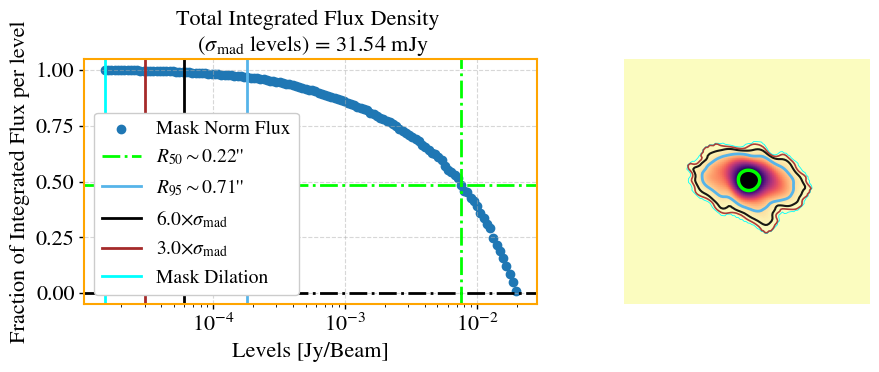

2024-03-13 07:19:42 - INFO -   CALC >> Computing Petrosian properties.


1


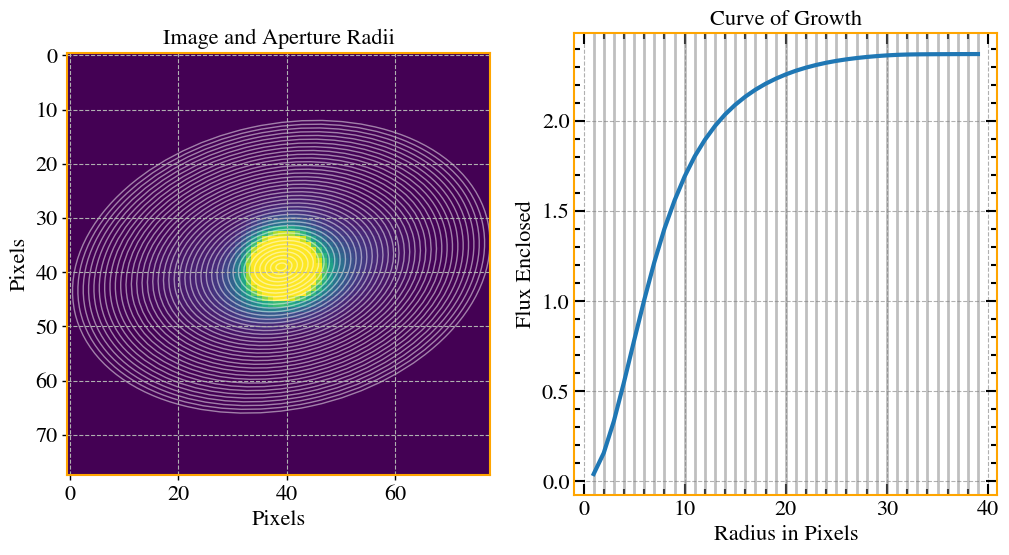

eta = 0.2
epsilon = 2
r_half_light (old vs new) = 6.88
r_total_flux (old vs new) = 29.86
R50 =  6.883576715343068
Rp= 14.932186437287458


/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


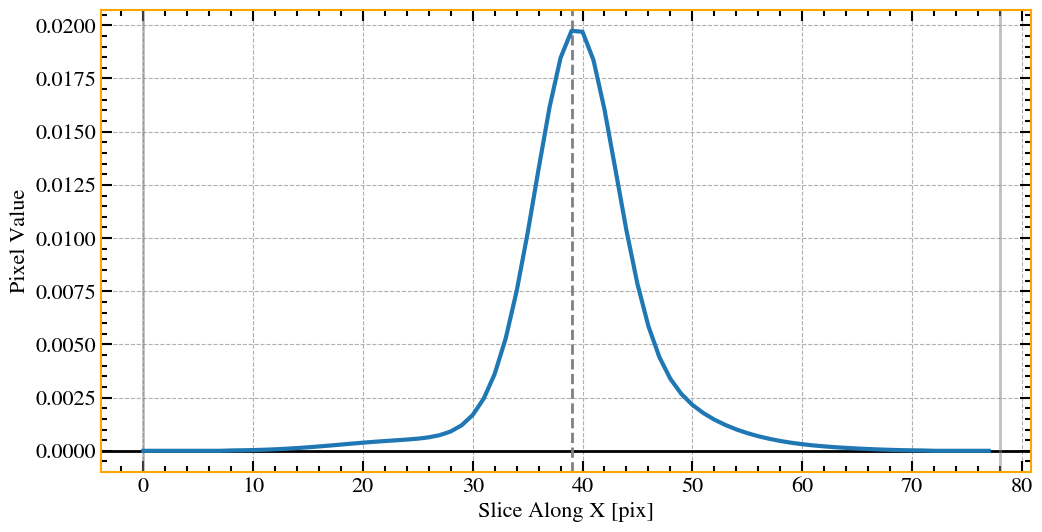

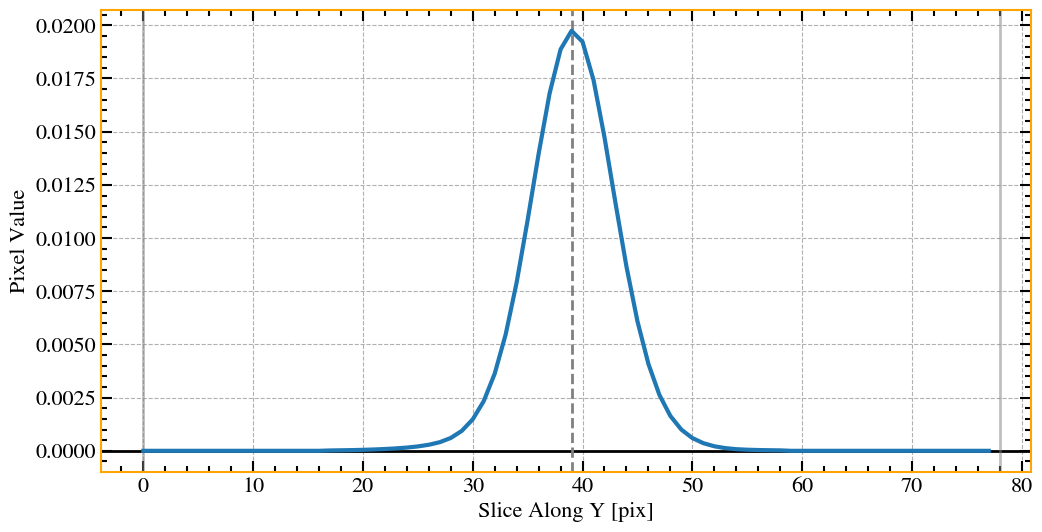

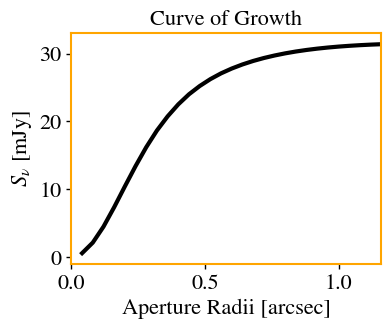

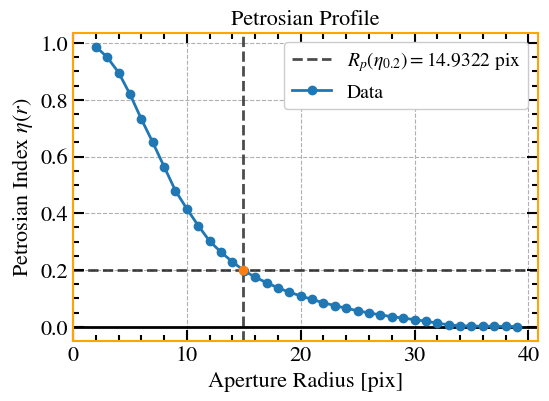

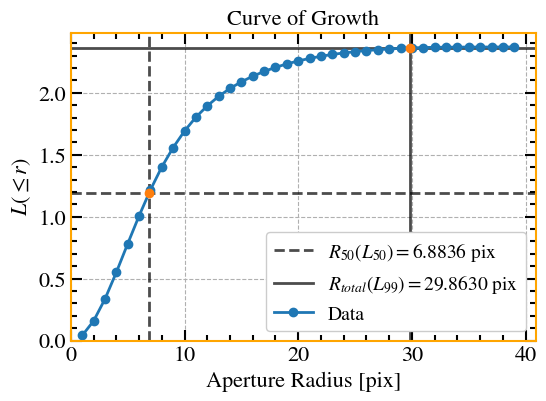

/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing asymetries...
--==>> Computing image statistics...


100%|██████████| 10/10 [00:00<00:00, 53.12it/s]


In [136]:
analysis = mp.radio_image_analysis(input_data,
                                   do_petro = True,
                                   # z=mlibs.z_d['VV705'],
                                   crop=False,box_size=400,
                                   vmin_factor=3.0,last_level=1.5)

#### Output quantities
Note that multiple quantities are calculated (many of them are for 
testing/debugging purposes). They are stored in `image_measures`. For now, the ones that are relevant are: 
- `total_flux_mask` > Total integrated flux inside the dilated mask
- `uncertain_flux` > Total integrated flux density inside the dilated mask (from `6*rms` to ~ `3*rms`). We can consider this as an uncertainty of the flux density.
- `C50radii` > Half-flux equivalent circular radius of the source.
- `C95radii` > approximated full-size circular radius of the source.
    (at the 95% flux)
- `Rp` > Petrosian radius
- `R50p` > Half-flux radius of the source from Petrosian photometry
- `R90p` > approximated full-size radius of the source (at the 95% flux) from the Petrosian photometry
- `rms_residual` > background rms of the residual image
- `peak_of_flux` > peak brightness of the radio map
- `(x0,y0)` > peak brightness position
- `(x0c,y0c)` > centroid position
- `(x0m,y0m)` > brightness momentum centre position
- `A50` > area enclosing half of the total flux (as multiple of the restoring 
    beam area)
- `A95` > total estimated emission area (as multiple of the restoring beam area)
- `qmi` > median averaged axis ratio of the region enclosing the half-light flux
- `qmo` > median averaged axis ratio of the outer region (from A50)
- `PAmi` > median averaged position angle (in degrees) of the region enclosing 
    the half-light flux
- `PAmo` > median averaged position angle (in degrees) of the outer region 
    (from A50)


All measured quantities are saved in a file in the form `*_stats.csv`, containing the dictionary `analysis.image_measures`.

In [137]:
analysis.image_measures

{'peak_of_flux': 0.019740626215934753,
 'total_flux': 0.031545042043054,
 'inner_flux': 0.02455307633055947,
 'low_flux': 0.0002606284098667116,
 'mid_flux': 0.006458625398371632,
 'uncertain_flux': 0.00027271190425618607,
 'inner_flux_f': 0.7783497735412239,
 'low_flux_f': 0.008262103740771529,
 'mid_flux_f': 0.20474296371381048,
 'uncertain_flux_f': 0.008645159004193983,
 'number_of_beams': 24.712620952912108,
 'n_beams_inner': 3.5265721876799723,
 'n_beams_mid': 13.108202282508575,
 'n_beams_low': 3.3668783527661623,
 'n_beams_uncertain': 7.771766632472089,
 'total_flux_nomask': 0.03165570706116946,
 'total_flux_mask': 0.0315477617500541,
 'max_residual': 1.528512621007394e-05,
 'min_residual': -2.7966172638116404e-05,
 'flux_residual': 3.4635741288385532e-06,
 'flux_error_res': 1.039072238651566e-05,
 'flux_error_res_2': 0.00021643678309341826,
 'flux_error_res_3': 0.0015773918957178831,
 'mad_std_residual': 7.393056729033741e-06,
 'rms_residual': 6.863673052558689e-06,
 'total_flu

#### Check total fluxes densities

In [138]:
# proper estimate for the total integrated flux  (good estimate, even if image contains deconvolution errors). 
# However, sometimes may be underestimated. 
f"{analysis.image_measures['total_flux_mask'] * 1e3:.2f} mJy"


'31.55 mJy'

In [139]:
# upper total integrated flux  (may be overstimated if image contains deconvolution errors)
f"{analysis.image_measures['total_flux_nomask'] * 1e3:.2f}mJy"

'31.66mJy'

In [140]:
#total integrated flux (only uses positive pixel values, ignores negative intensities)
f"{analysis.image_measures['total_flux_levels'] * 1e3:.2f}mJy"

'31.54mJy'

#### Check uncertainties
For well calibrated, good quality images, the uncertainties given below should be very similar 
to each other. 


In [141]:
f"{analysis.image_measures['uncertain_flux']*1e3:.2f}mJy"

'0.27mJy'

In [142]:
f"{analysis.image_measures['flux_error_res']*1e3:.2f}mJy"

'0.01mJy'

In [143]:
f"{analysis.image_measures['flux_error_res_2']*1e3:.2f}mJy"

'0.22mJy'

In [144]:
f"{analysis.image_measures['flux_error_res_3']*1e3:.2f}mJy"

'1.58mJy'

In [145]:
f"{analysis.image_measures['rms_residual'] * 1e6:.2f} mu Jy/beam"

'6.86 mu Jy/beam'

#### Physical Sizes
We can also provide what is the redshift of the source. With that, conversions to physical sizes will be computed. 

If you do know the redshift, use the argument `z`. 

If you do not know, but trust the redshift provided by NED, use the function `find_z_NED`. For example: 

In [146]:
# from astroquery.ipac.ned import Ned
# result_table = Ned.query_object("MCG12-02-001")
# redshift_NED = result_table['Redshift'].data.data

In [147]:
redshift_source = mlibs.find_z_NED("UGC5101")

In [148]:
#In principle, multiple cross-IDs recognised by NED should work.
mlibs.find_z_NED('MCG+10-14-025')

0.039367

In [149]:
mlibs.find_z_NED('LEDA 027292')

0.039367

In [150]:
mlibs.find_z_NED("IRAS 09320+6134")

0.039367

2024-03-13 07:19:51 - INFO - Computing image level statistics.
2024-03-13 07:19:51 - INFO -   CALC >> Performing mask dilation.


 ==>  Dilation size is 4 [px]


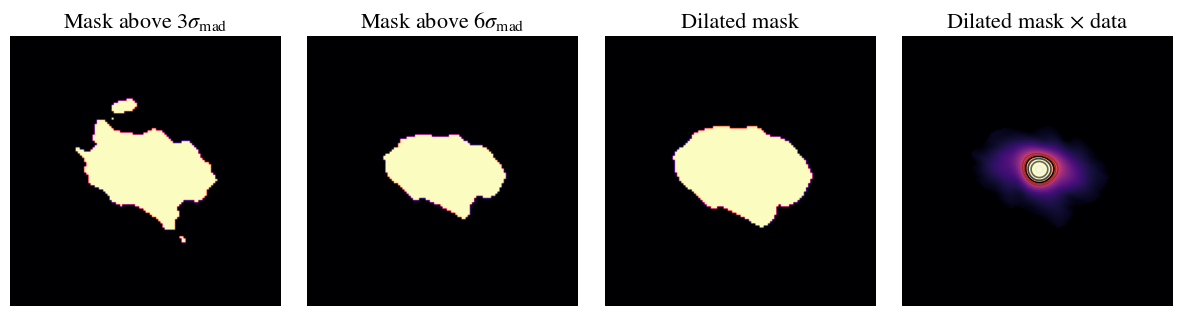

2024-03-13 07:19:52 - INFO -   CALC >> Performing level statistics.
2024-03-13 07:19:52 - INFO -   CALC >> Computing image properties.
2024-03-13 07:19:52 - INFO - +---------------------------+
2024-03-13 07:19:52 - INFO - | Basic Source Properties |
2024-03-13 07:19:52 - INFO - +---------------------------+
2024-03-13 07:19:52 - DEBUG -  ==>  Peak of Flux=19.74 [mJy/beam]
2024-03-13 07:19:52 - DEBUG -  ==>  Total Flux Inside Mask='31.55 [mJy]
2024-03-13 07:19:52 - DEBUG -  ==>  Total Flux Image=31.66 [mJy]
2024-03-13 07:19:52 - DEBUG -  ==>  Half-Light Radii=5.38 [px]
2024-03-13 07:19:52 - DEBUG -  ==>  Total Source Size=17.69 [px]
2024-03-13 07:19:52 - DEBUG -  ==>  Source Global Axis Ratio=0.65
2024-03-13 07:19:52 - DEBUG -  ==>  Source Global PA=167.93 [degrees]
2024-03-13 07:19:52 - DEBUG -  ==>  Inner Axis Ratio=0.90
2024-03-13 07:19:52 - DEBUG -  ==>  Outer Axis Ratio=0.65
2024-03-13 07:19:52 - DEBUG -  ==>  Inner PA=133.74 [degrees]
2024-03-13 07:19:52 - DEBUG -  ==>  Outer PA=

-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 31.55 +/- 0.22 mJy
Fractional error = 0.01
Flux Density and error (quadrature total): 
Flux Density = 31.55 +/- 1.58 mJy
Fractional error = 0.05
-----------------------------------------------------------------
16 64 48


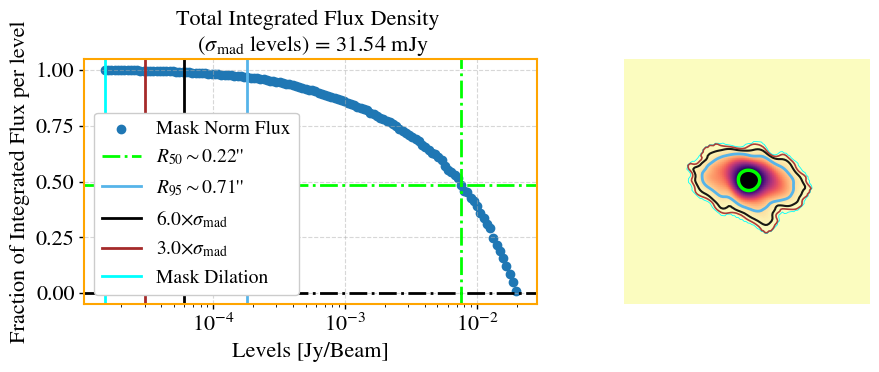

2024-03-13 07:19:53 - INFO -   CALC >> Computing Petrosian properties.


1


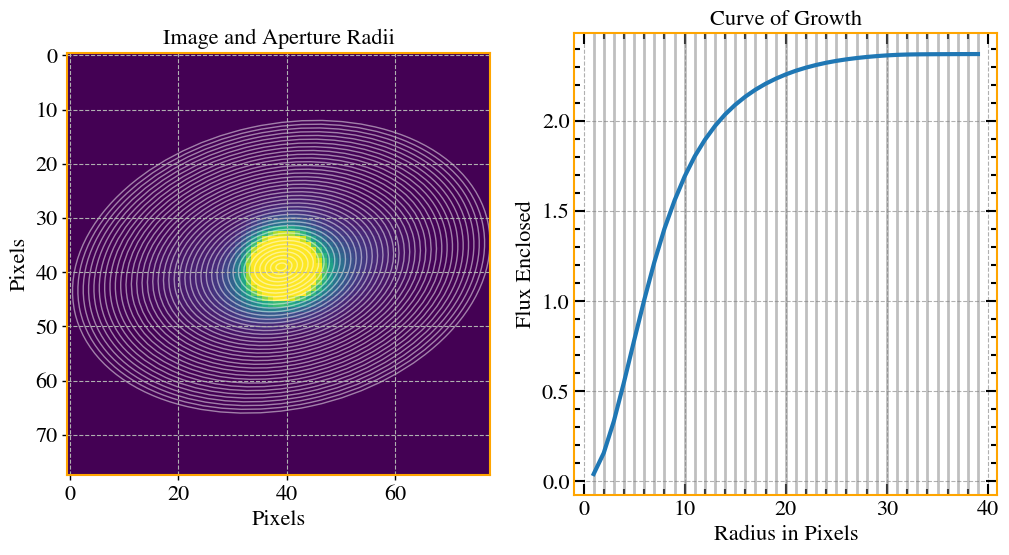

eta = 0.2
epsilon = 2
r_half_light (old vs new) = 6.88
r_total_flux (old vs new) = 29.86
R50 =  6.883576715343068
Rp= 14.932186437287458


/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


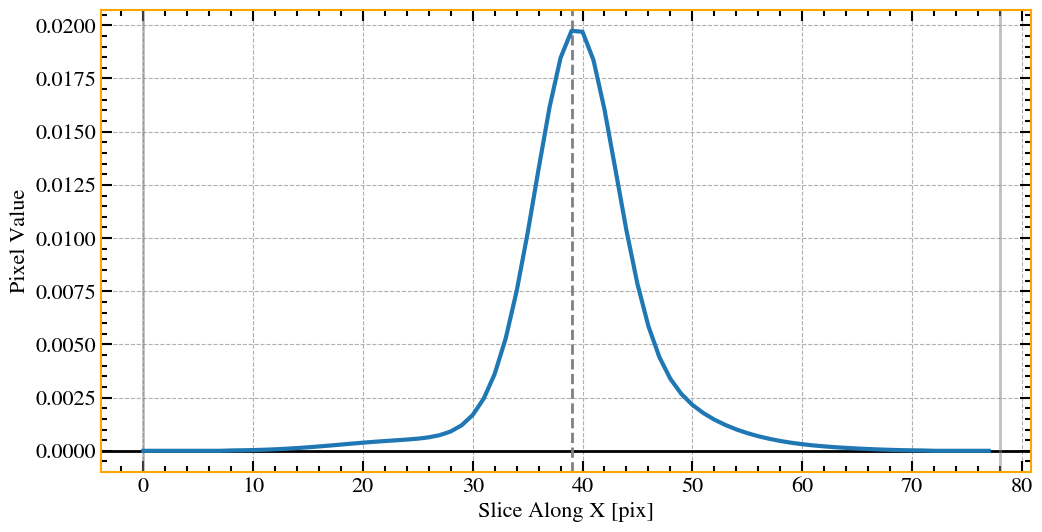

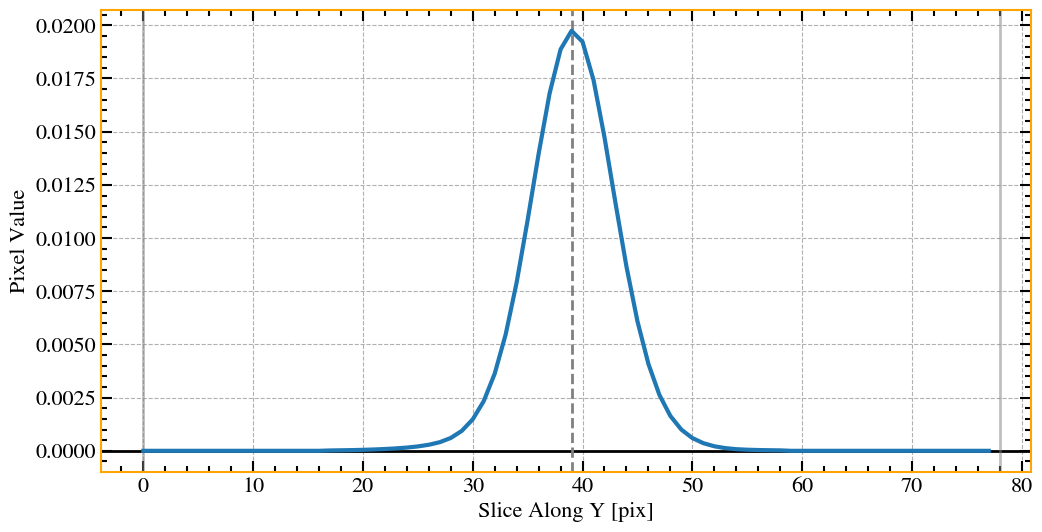

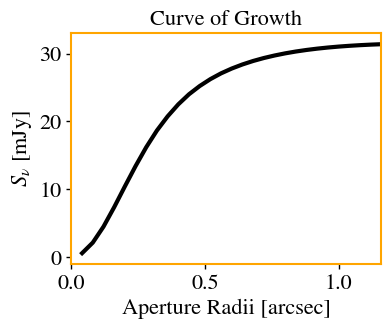

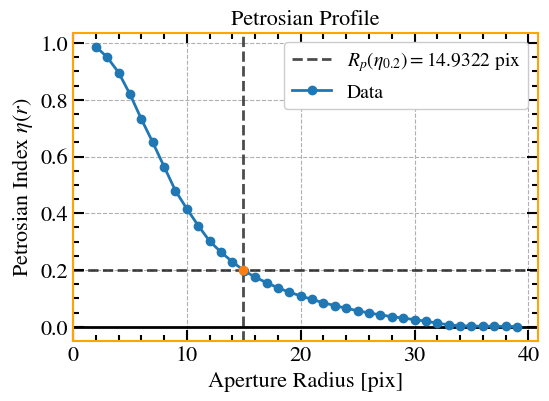

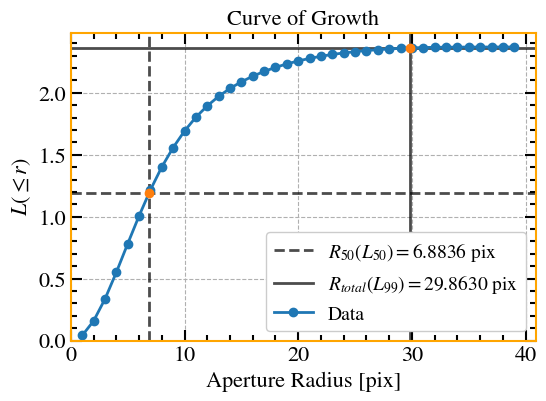

/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing asymetries...
--==>> Computing image statistics...


100%|██████████| 10/10 [00:00<00:00, 70.83it/s]


In [151]:
analysis = mp.radio_image_analysis(input_data,
                                   do_petro = True,
                                   z=redshift_source,
                                   crop=False,box_size=350,
                                   vmin_factor=3.0,last_level=1.5)

For reference, the function that computes pixel sizes to parsecs is `pixsize_to_pc`:

In [152]:
mlibs.pixsize_to_pc??


Signature: mlibs.pixsize_to_pc(z, cell_size, Om0=0.308)
Docstring: <no docstring>
Source:   
def pixsize_to_pc(z, cell_size, Om0=0.308):
    h = 67.8  # * (h1 + h2) / 2
    cosmo = FlatLambdaCDM(H0=h, Om0=Om0)
    d_A = cosmo.angular_diameter_distance(z=z)
    # print('D_a = ', d_A)  # 946.9318492873492 Mpc
    theta = cell_size * u.arcsec
    distance_pc = (theta * d_A).to(u.pc, u.dimensionless_angles())  # unit is Mpc only now

    # print('Linear Distance = ', distance_pc)  # 3.384745689510495 Mpc
    return (distance_pc.value)
File:      /media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/libs/libs.py
Type:      function

In [153]:
# The pixel size is stored in:
f"{analysis.image_measures['pix_to_pc']} pc"

'32.1803902504463 pc'

In [154]:
# # print(f"Redshift of VV705 = {z_d['VV705']}")
# pix_to_pc = mlibs.pixsize_to_pc(z=mlibs.find_z_NED("MCG12-02-001"),
#                           cell_size=mlibs.get_cell_size(input_data.filename))

In [155]:
# Now, we can get the half-light circular radii of the source in pc:
f"{analysis.image_measures['C50radii']*analysis.image_measures['pix_to_pc']:.1f} pc"

'173.2 pc'

In [156]:
# and the full size circular radii:
f"{analysis.image_measures['C95radii']*analysis.image_measures['pix_to_pc']:.1f} pc"

'569.2 pc'

In [157]:
analysis.image_measures

{'peak_of_flux': 0.019740626215934753,
 'total_flux': 0.031545042043054,
 'inner_flux': 0.02455307633055947,
 'low_flux': 0.0002606284098667116,
 'mid_flux': 0.006458625398371632,
 'uncertain_flux': 0.00027271190425618607,
 'inner_flux_f': 0.7783497735412239,
 'low_flux_f': 0.008262103740771529,
 'mid_flux_f': 0.20474296371381048,
 'uncertain_flux_f': 0.008645159004193983,
 'number_of_beams': 24.712620952912108,
 'n_beams_inner': 3.5265721876799723,
 'n_beams_mid': 13.108202282508575,
 'n_beams_low': 3.3668783527661623,
 'n_beams_uncertain': 7.771766632472089,
 'total_flux_nomask': 0.03165570706116946,
 'total_flux_mask': 0.0315477617500541,
 'max_residual': 1.528512621007394e-05,
 'min_residual': -2.7966172638116404e-05,
 'flux_residual': 3.4635741288385532e-06,
 'flux_error_res': 1.039072238651566e-05,
 'flux_error_res_2': 0.00021643678309341826,
 'flux_error_res_3': 0.0015773918957178831,
 'mad_std_residual': 7.393056729033741e-06,
 'rms_residual': 6.863673052558689e-06,
 'total_flu

In [158]:
analysis.image_measures

{'peak_of_flux': 0.019740626215934753,
 'total_flux': 0.031545042043054,
 'inner_flux': 0.02455307633055947,
 'low_flux': 0.0002606284098667116,
 'mid_flux': 0.006458625398371632,
 'uncertain_flux': 0.00027271190425618607,
 'inner_flux_f': 0.7783497735412239,
 'low_flux_f': 0.008262103740771529,
 'mid_flux_f': 0.20474296371381048,
 'uncertain_flux_f': 0.008645159004193983,
 'number_of_beams': 24.712620952912108,
 'n_beams_inner': 3.5265721876799723,
 'n_beams_mid': 13.108202282508575,
 'n_beams_low': 3.3668783527661623,
 'n_beams_uncertain': 7.771766632472089,
 'total_flux_nomask': 0.03165570706116946,
 'total_flux_mask': 0.0315477617500541,
 'max_residual': 1.528512621007394e-05,
 'min_residual': -2.7966172638116404e-05,
 'flux_residual': 3.4635741288385532e-06,
 'flux_error_res': 1.039072238651566e-05,
 'flux_error_res_2': 0.00021643678309341826,
 'flux_error_res_3': 0.0015773918957178831,
 'mad_std_residual': 7.393056729033741e-06,
 'rms_residual': 6.863673052558689e-06,
 'total_flu

In [159]:
print(analysis.image_measures['C50radii'])#half-light radii source size in pixels
print(analysis.image_measures['C95radii'])#total source size in pixels

5.382025607773058
17.688940559532284


### Asymmetry and Concentration

In [160]:
analysis.image_measures['A1']

0.168725563457586

In [161]:
#internal implementation
analysis.image_measures['C1']

0.5214542743815872

In [162]:
# using PetroFit
analysis.image_measures['C1p']

0.520097464248007

## Compare fractional radius using intensity levels growth curve, spline and PetroFit.

 ==>  Dilation size is 4 [px]
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 31.66 +/- 0.28 mJy
Fractional error = 0.01
Flux Density and error (quadrature total): 
Flux Density = 31.66 +/- 1.58 mJy
Fractional error = 0.05
-----------------------------------------------------------------
16 64 48


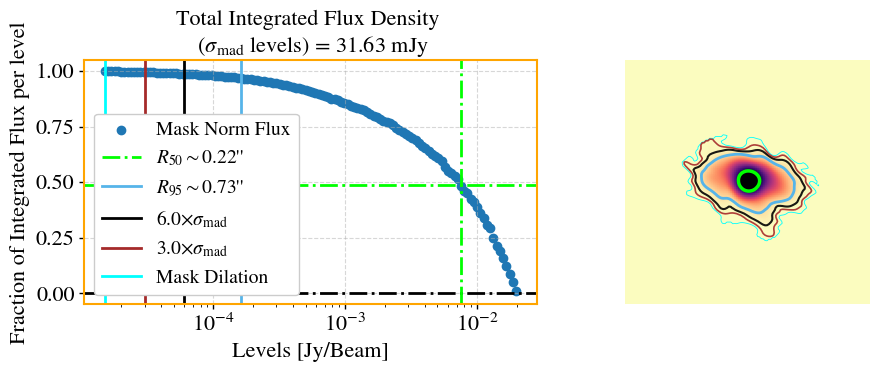

In [163]:
image_measures = mlibs.compute_image_properties(input_data.filename,
                                                input_data.residualname,
                                                # rms=input_data.rms_res,
                                                last_level=1.5)

In [164]:
levels, fluxes, _, _, _, results_measures = image_measures

In [165]:
Lgrow = np.cumsum(fluxes)
Lgrow_norm = Lgrow / fluxes.sum()

In [166]:
input_data.image_data_2D.max()

0.019740626215934753

In [167]:
_radii = []
for i in range(0, len(levels)):
    mask_at_level_i = input_data.image_data_2D >= levels[i]
    circular_radii = np.sqrt(np.sum(mask_at_level_i) / np.pi)
    print(circular_radii)
    _radii.append(circular_radii)
radii = np.asarray(_radii)

0.5641895835477563
1.381976597885342
1.8712051592547776
2.256758334191025
2.5854414729132054
2.876813695875796
3.0901936161855166
3.385137501286538
3.742410318509555
3.8678889139475245
4.1073621666150775
4.296739856991561
4.54864184146723
4.720348719413148
4.853342309955121
5.077706251929807
5.140011726956917
5.382025607773058
5.641895835477563
5.781222885281108
5.917270272703197
6.023896332520351
6.180387232371033
6.4820448144285745
6.627726932618989
6.770275002573076
6.863662517577698
7.001408606295148
7.203090409536582
7.334464586120832
7.527227892173502
7.694520051971082
7.817640190446719
7.978845608028654
8.117274569709014
8.234075889688375
8.42514715711158
8.593479713983122
8.79484521425256
8.95623198216277
9.044647077096718
9.218933756735217
9.373021315815206
9.557977680176279
9.706684619910241
9.83698151873187
10.124020118074668
10.31094088749354
10.433694507453072
10.585134856802455
10.764051215546116
10.896310731002211
11.141851534268367
11.32602684669552
11.507254783503184
1

In [168]:
np.sum(mask_at_level_i)

2839

In [169]:
len(radii)

128

[]

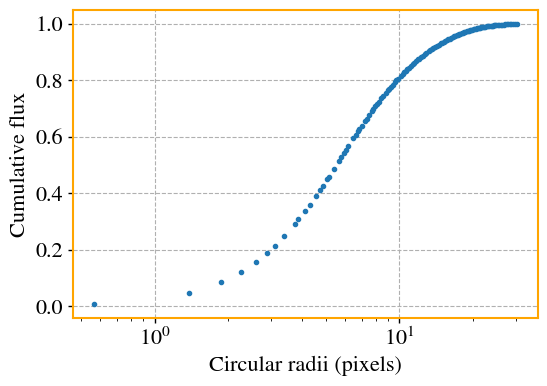

In [170]:
mlibs.plt.plot(radii,Lgrow_norm,'.')
mlibs.plt.xlabel('Circular radii (pixels)')
mlibs.plt.ylabel('Cumulative flux')
mlibs.plt.semilogx()

In [171]:
from scipy.interpolate import interp1d

def find_fractional_radius(cumulative_flux, radii, fraction):
    """
    Calculate the radius that encloses a given fraction of the total flux.
    
    Parameters:
    - cumulative_flux: numpy array of cumulative flux densities
    - radii: numpy array of radii corresponding to the cumulative flux densities
    - fraction: the fraction of the total flux for which to calculate the radius
    
    Returns:
    - radius_at_fraction: the radius that encloses the specified fraction of the total flux
    """
    # Ensure the fraction is between 0 and 1
    if not (0 < fraction < 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    # Calculate the total flux to find the target flux for the given fraction
    total_flux = cumulative_flux[-1]
    target_flux = total_flux * fraction
    
    # Use spline interpolation to create a smooth function of cumulative flux vs radius
    spline = interp1d(cumulative_flux, radii, kind='cubic')
    
    # Use the interpolated function to find the radius for the target flux
    radius_at_fraction = spline(target_flux)
    
    return radius_at_fraction



In [172]:
fraction = 0.90  

fractional_radius = find_fractional_radius(Lgrow_norm, radii, fraction)
print("Fractional Radius:", fractional_radius)

Fractional Radius: 13.042905978457828


In [173]:
results_measures['C90radii']

13.528790949515026

In [174]:
analysis.image_measures['R90p']

16.332266453290657

### Breaking the Radio emission into multiple components
Now, we describe how to break the radio emission into multiple components, using a source extraction algorithm.

In order this to work, some assumptions need to be made.
1. Using the same interferometric visibility, images with different angular resolutions can be recovered. One must be used as the reference image for the source detection. At the current version, is upt to you to choose the reference image.
2. In the same way, a reference mask must be provided. A good choice is to use the mask from the image restored with the largest restoring beam (highest sensitivity).


From the reference detection mask, the algorithm will create relevant sub-masks for each detected structure, and also dilate those masks. The dilation contain two constraints:
1. Overlap between the sub-masks is not allowed.
2. The maximum dilation is limited by the boundaries of the reference mask (largest).

In this example, we are going to use NGC7674, a classic example of a double-lobed radio galaxy, morphologically classified as Seyfer 2.


In [182]:
# First, define the path to the data.
root_path = '../../data_examples/data_examples_general/vla_only/NGC7674_Ku/'
#To easily list files in a directory, use the glob module, setting a prefix of your images.
# In this example, images produced by WSClean have the prefix '-MFS-image.fits'
prefix_images = '*MFS-image.fits'
imagelist = mlibs.glob.glob(root_path+prefix_images)

### Sorting a list of images by beam-size. 

imagelist,residuallist = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist,
                                 return_df = False)
    

100%|██████████| 3/3 [00:00<00:00, 77.23it/s]

0 >> final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-2.0-MFS-image.fits
1 >> final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-1.0-MFS-image.fits
2 >> final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..0.5-MFS-image.fits


In [183]:
# lets select another image from our list of images. 
idx = 0#select one index from the list. 
input_data=mp.read_data(filename=imagelist[idx],
                        residualname=residuallist[idx])

++>> Image File: final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-2.0-MFS-image.fits
++>> Residual File: final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-2.0-MFS-residual.fits
-->> No PSF File was provided.


[531 466   0   0]
23:27:56.7097, +08.46.44.1320, 1.49995e+10Hz, I
351.98629041666663 8.778925555555556


<Axes: xlabel='Offset [arcsec]'>

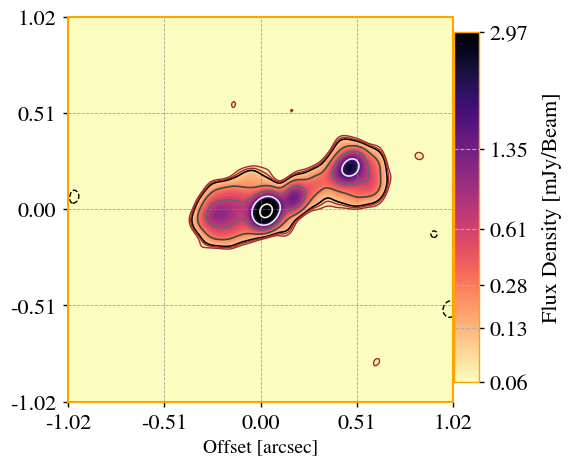

In [184]:
cutout_size = 256
ra,dec,new_filename = mlibs.cutout_2D_radec(imagename=input_data.filename,
                                            residualname=input_data.residualname,
                                            cutout_size = cutout_size,
                                            special_name='')
mlibs.eimshow(new_filename)

In [186]:
imagelist_c = []
residuallist_c = []
for i in mlibs.tqdm(range(len(imagelist))):
    _,_,image_c = mlibs.cutout_2D_radec(imagename=imagelist[i],
                                            residualname=residuallist[i],
                                            ra_f=ra,dec_f=dec,
                                            cutout_size = cutout_size,
                                            special_name='')
    imagelist_c.append(image_c)
    residuallist_c.append(image_c.replace('-image.cutout.fits','-residual.cutout.fits'))

100%|██████████| 3/3 [00:00<00:00, 55.80it/s]


In [187]:
imagelist_c

['../../data_examples/data_examples_general/vla_only/NGC7674_Ku/final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-2.0-MFS-image.cutout.fits',
 '../../data_examples/data_examples_general/vla_only/NGC7674_Ku/final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-1.0-MFS-image.cutout.fits',
 '../../data_examples/data_examples_general/vla_only/NGC7674_Ku/final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..0.5-MFS-image.cutout.fits']

In [188]:
residuallist_c

['../../data_examples/data_examples_general/vla_only/NGC7674_Ku/final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-2.0-MFS-residual.cutout.fits',
 '../../data_examples/data_examples_general/vla_only/NGC7674_Ku/final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-1.0-MFS-residual.cutout.fits',
 '../../data_examples/data_examples_general/vla_only/NGC7674_Ku/final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..0.5-MFS-residual.cutout.fits']

++>> Image File: final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..0.5-MFS-image.cutout.fits
++>> Residual File: final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..0.5-MFS-residual.cutout.fits
-->> No PSF File was provided.
 ==>  Dilation size is 7 [px]


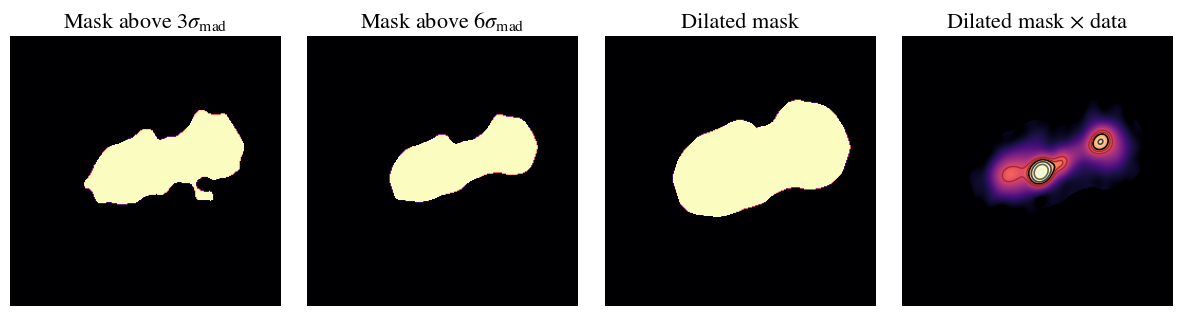

In [190]:
# lets generate the largest mask.
idx = -1 #select the index from the lowest resolution image.
input_data=mp.read_data(filename=imagelist_c[idx],
                        residualname=residuallist_c[idx])

rms = mlibs.mad_std(input_data.residual_data_2D)
_, mask = mlibs.mask_dilation(input_data.filename, 
                              PLOT=True,dilation_type='disk',
                              sigma=6, iterations=2, dilation_size=None)


Now, lets make a catalog of sources.

In [191]:
import libs as mlibs
from importlib import reload
reload(mlibs)


                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
   Radio Morphen              |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _+;]@.
                                                 _/_             |]\|    .  _
                                              ...._@* __ .

<module 'libs' from '/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py'>

In [192]:
idx = 0 #select the index of the detection image.
input_data_detection=mp.read_data(filename=imagelist_c[idx],
                        residualname=residuallist_c[idx])

++>> Image File: final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-2.0-MFS-image.cutout.fits
++>> Residual File: final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..-2.0-MFS-residual.cutout.fits
-->> No PSF File was provided.


In [193]:
input_data_detection.image_data_2D

array([[-5.83602423e-06, -9.88807187e-06, -1.25616889e-05, ...,
        -3.85595158e-05, -3.69760564e-05, -3.37003839e-05],
       [-4.84703605e-06, -8.16793181e-06, -1.02375179e-05, ...,
        -3.90771020e-05, -3.70617818e-05, -3.33868666e-05],
       [-3.86946340e-06, -6.43636849e-06, -7.86873079e-06, ...,
        -3.84102495e-05, -3.60185986e-05, -3.20392501e-05],
       ...,
       [-1.97806548e-05, -1.99039350e-05, -1.97662357e-05, ...,
         1.33241956e-05,  1.63139302e-05,  1.85074477e-05],
       [-1.84433138e-05, -1.76290578e-05, -1.65202437e-05, ...,
         1.78942028e-05,  2.13170806e-05,  2.37449367e-05],
       [-1.65811234e-05, -1.49715879e-05, -1.30319440e-05, ...,
         2.16008029e-05,  2.53830858e-05,  2.80051790e-05]])

Deblending:   0%|          | 0/1 [00:00<?, ?it/s]

0
1
2


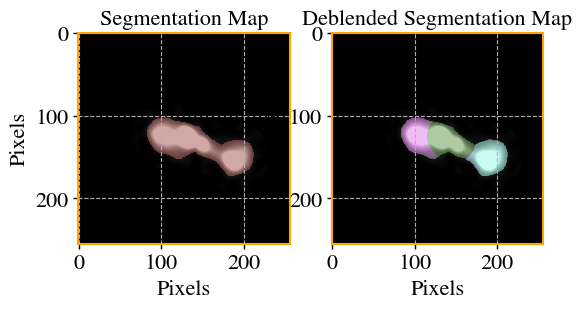

In [205]:
cat, segm, segm_deblend = mlibs.make_catalog(image=input_data_detection.image_data_2D*mask,
                                       threshold=6.0 * input_data_detection.rms_res,
                                       deblend=True,
                                    #    kernel_size=7,#this was deprecated in the new version of photutils/petrofit
                                    #    fwhm=3, #this was deprecated in the new version of photutils/petrofit
                                       npixels=int(mlibs.beam_area2(input_data_detection.filename)*1.0),
                                       nlevels = 64,
                                       plot=True, 
                                       vmax=0.1*input_data_detection.image_data_2D.max(),
                                       vmin=0.1 * input_data_detection.rms_res)
indices = mlibs.order_cat(cat, key='segment_flux', reverse=True)
masks_deblended = []
for k in range(len(indices)):
    print(k)
    masks_deblended.append(segm_deblend == segm_deblend.labels[indices[k]])
#         idx = sorted_idx_list[0]  # index 0 is largest

In [206]:
cat

<photutils.segmentation.catalog.SourceCatalog>
Length: 3
labels: [1 2 3]

If we have different images, we can use the detection masks and perform multi-structure analysis to all images using those sub-masks as a reference (i.e. alike forced photometry).

  0%|          | 0/1 [00:00<?, ?it/s]WARNING: FITSFixedWarning: The WCS transformation has more axes (4) than the image it is associated with (2) [astropy.wcs.wcs]


Using RMS from residual
     >> CALC: Performing mask dilation.
 ==>  Dilation size is 7 [px]


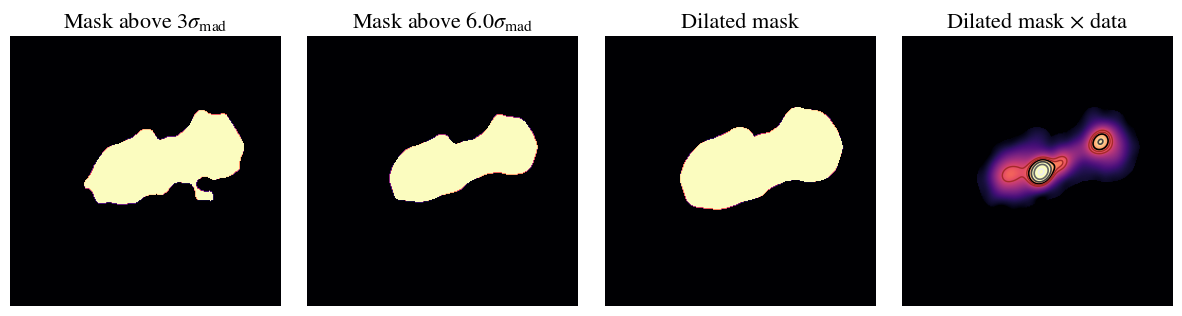

     >> CALC: Performing level statistics.
     >> CALC: Computing image properties.
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 17.35 +/- 0.19 mJy
Fractional error = 0.01
Flux Density and error (quadrature total): 
Flux Density = 17.35 +/- 0.87 mJy
Fractional error = 0.05
-----------------------------------------------------------------
32 128 96


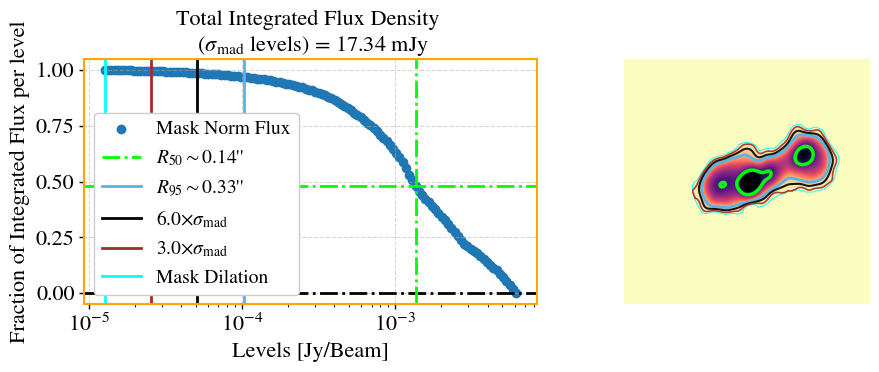

     >> CALC: Computing Petrosian properties.
1


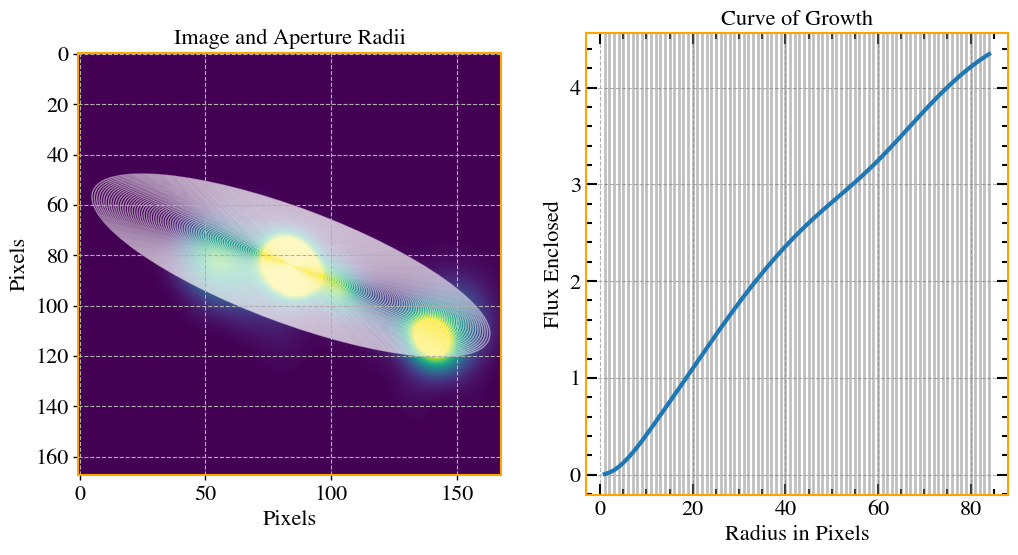

Rlast     >>  84
Rp        >>  nan
Rtotal    >>  nan
1


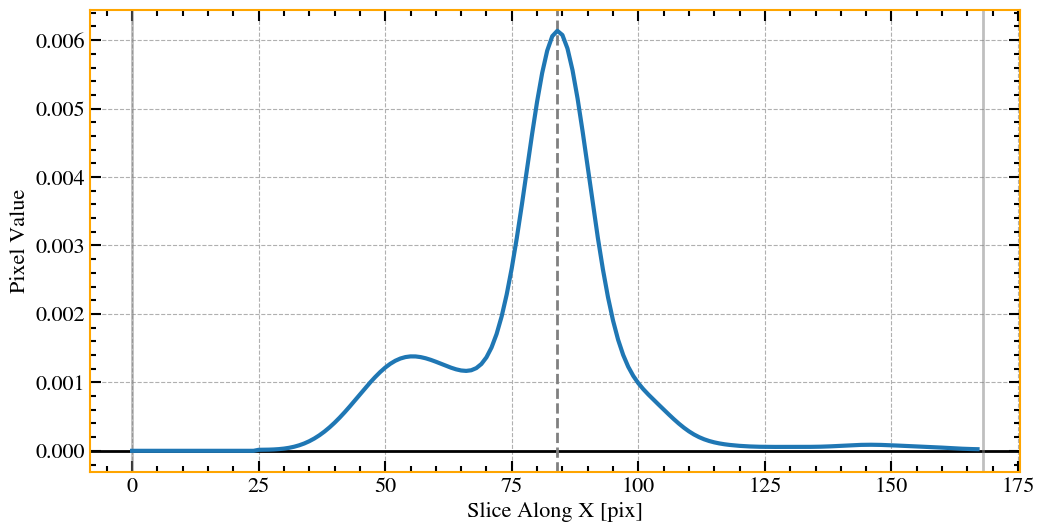

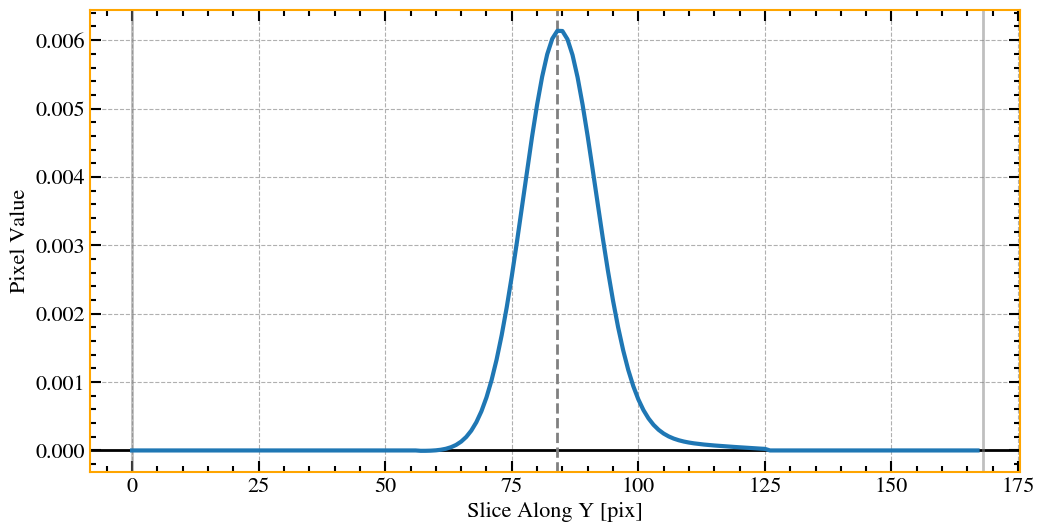

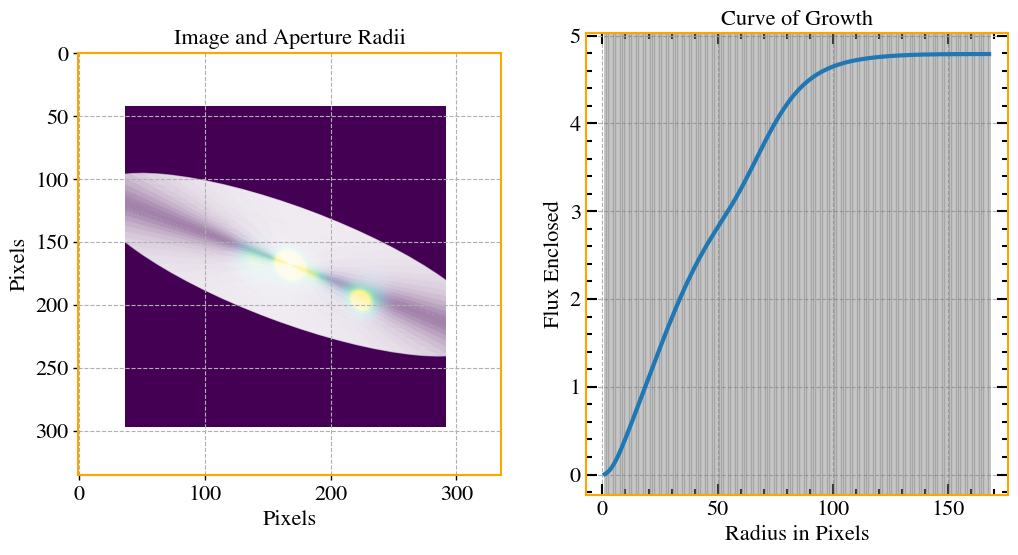

Rlast     >>  168
Rp        >>  90.93978795759152
Rtotal    >>  nan
1


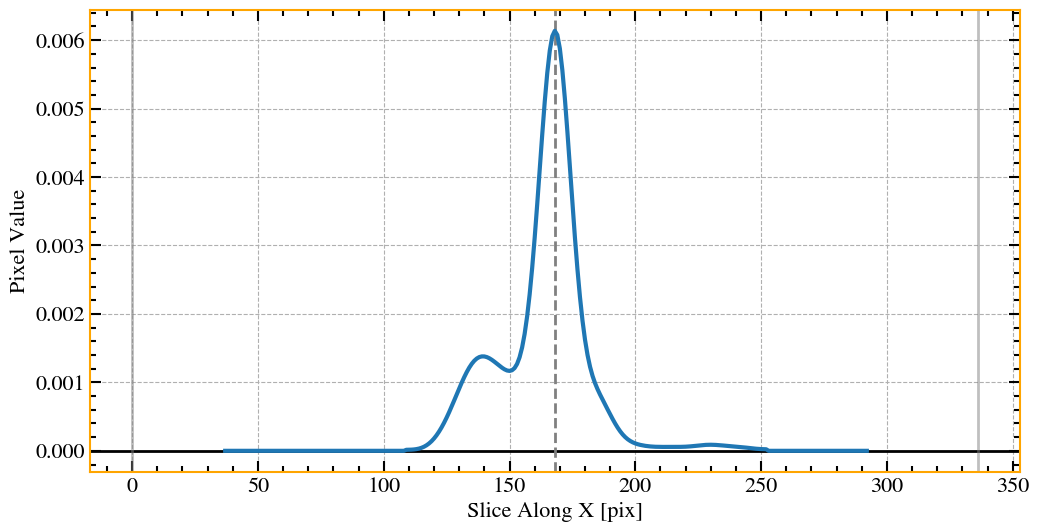

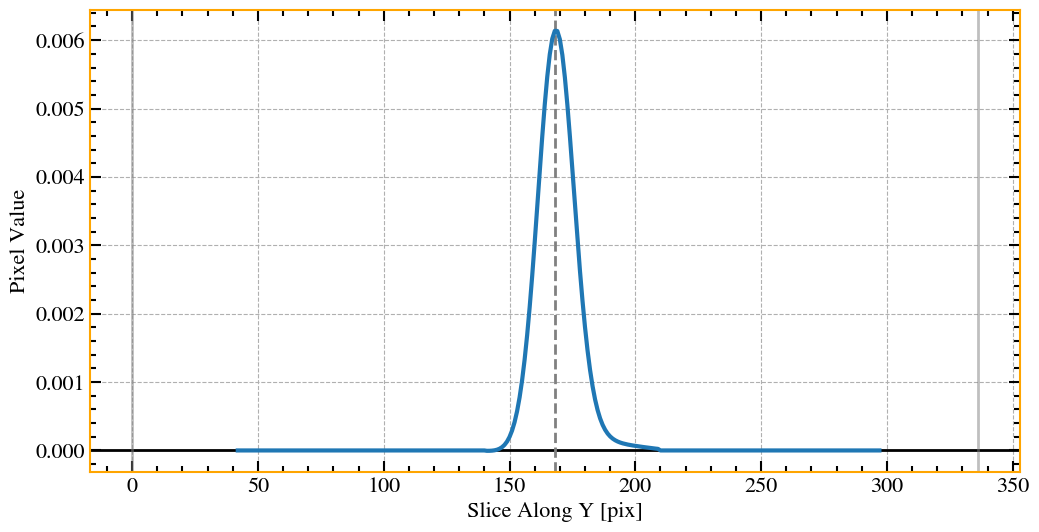

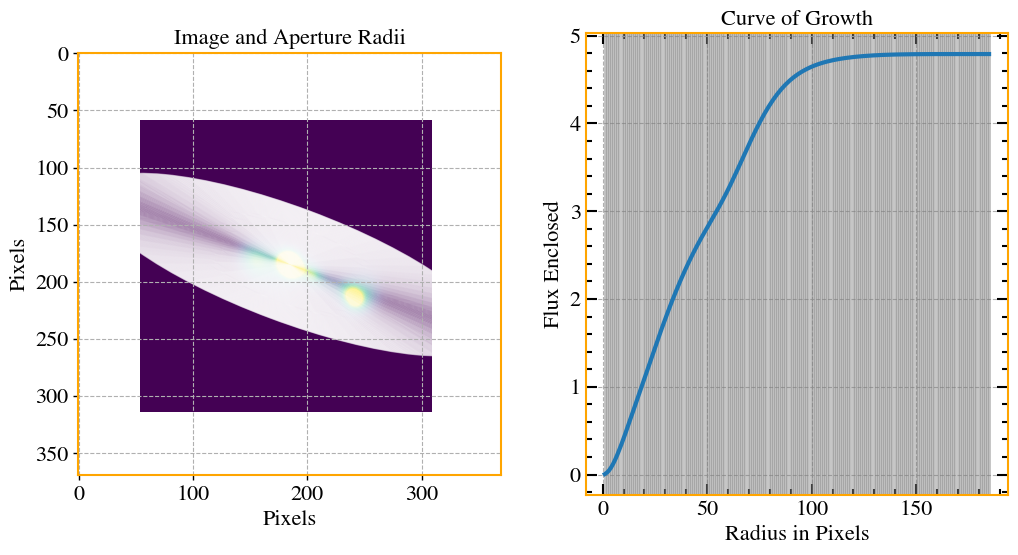

eta = 0.25
epsilon = 2
r_half_light (old vs new) = 41.21
r_total_flux (old vs new) = 165.79
R50 =  41.20785123870317
Rp= 87.35458257884824


/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


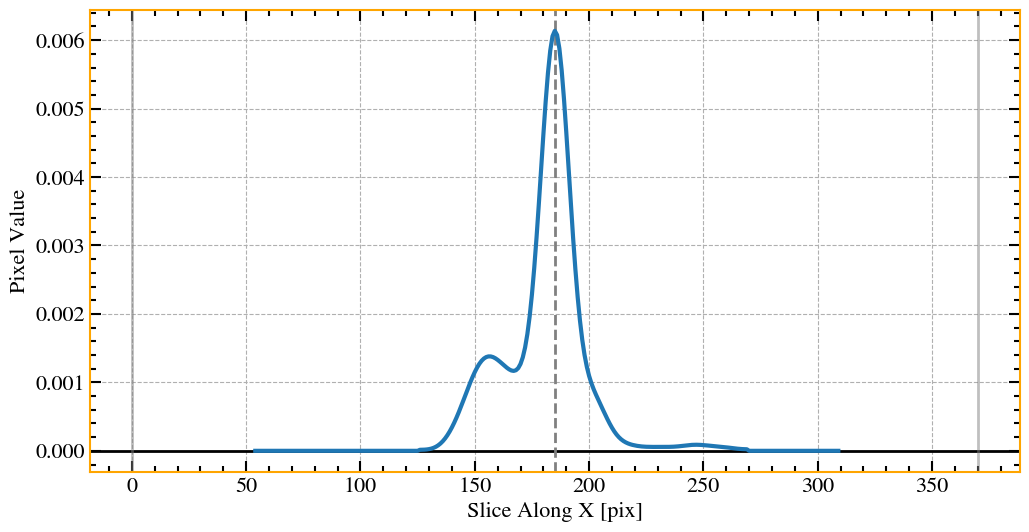

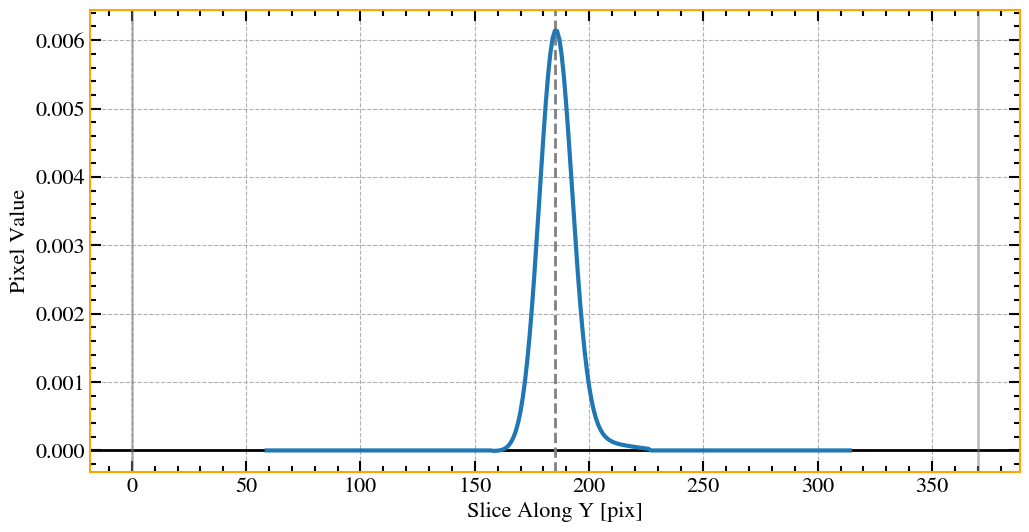

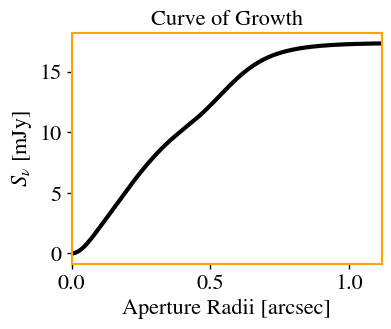

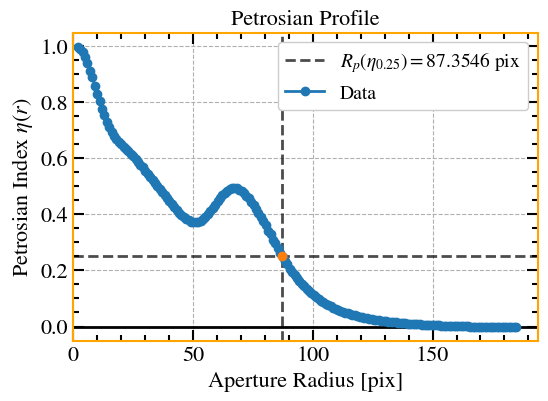

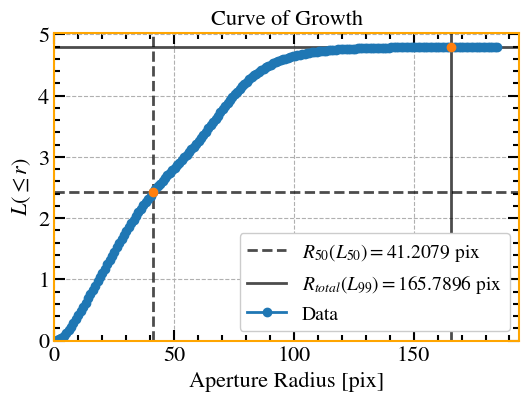

/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing image statistics...


100%|██████████| 10/10 [00:00<00:00, 48.35it/s]


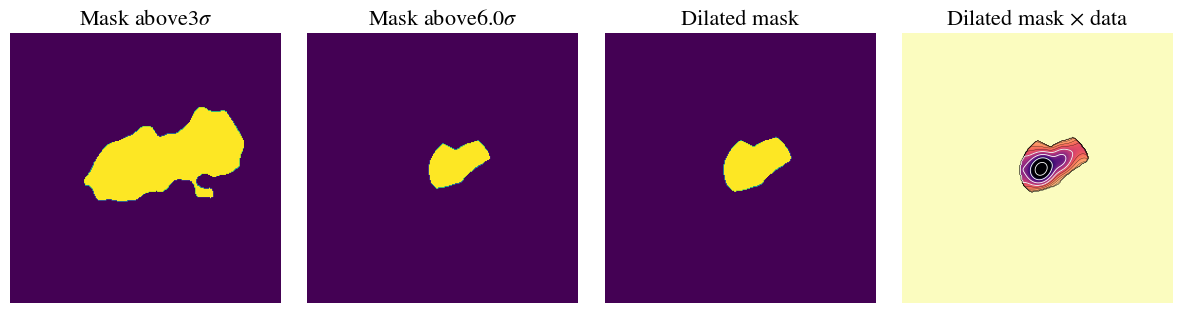

     >> CALC: Performing level statistics.
     >> CALC: Computing image properties.
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 8.93 +/- 0.04 mJy
Fractional error = 0.00
Flux Density and error (quadrature total): 
Flux Density = 8.93 +/- 0.45 mJy
Fractional error = 0.05
-----------------------------------------------------------------
32 128 96
non real ellipse


/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:168: RuntimeWarning: Mean of empty slice.
  remove_indexes = np.where(np.logical_or(abs(y - y.mean()) >
/home/sagauga/miniconda3/envs/morphen_stable/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:169: RuntimeWarning: Mean of empty slice.
  abs(y - y.mean()).mean() * 1.5, \
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:170: RuntimeWarning: Mean of empty slice.
  abs(x - x.mean()) >
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:171: RuntimeWarning: Mean of empty slice.
  abs(x - x.mean()).mean() * 1.5) == True)[0]
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/

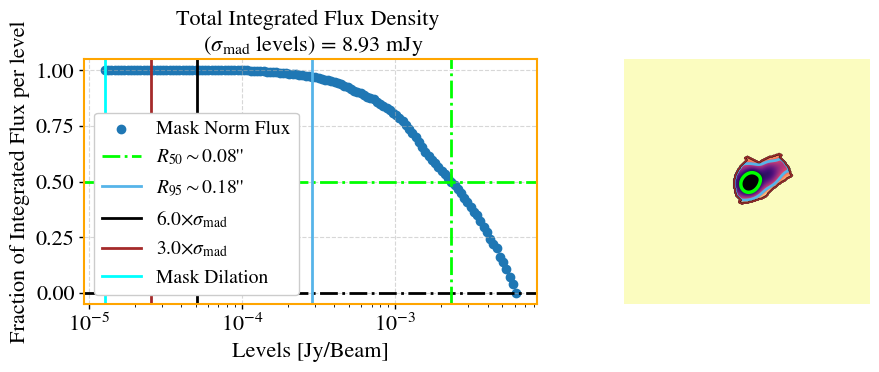

     >> CALC: Computing Petrosian properties.
1


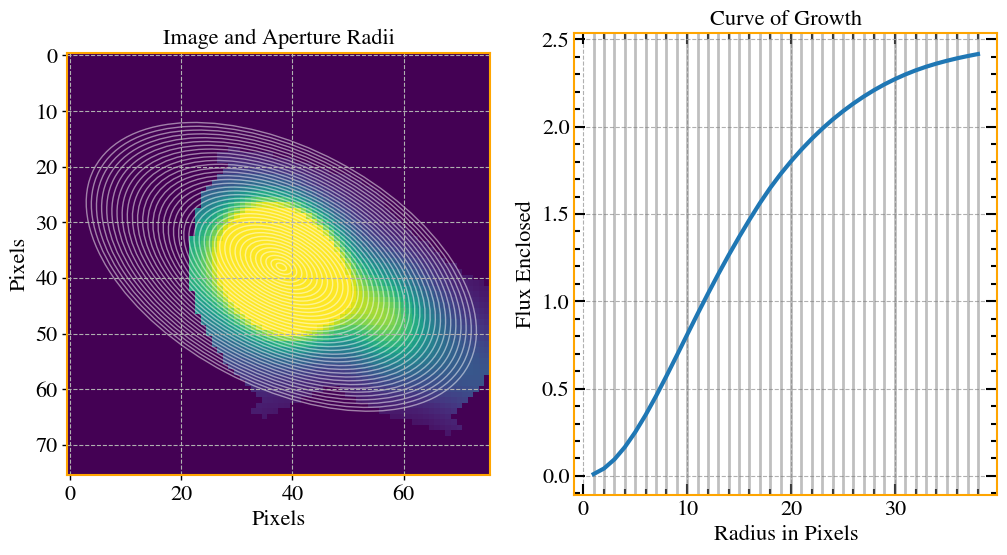

Rlast     >>  38
Rp        >>  29.98039607921584
Rtotal    >>  nan
1


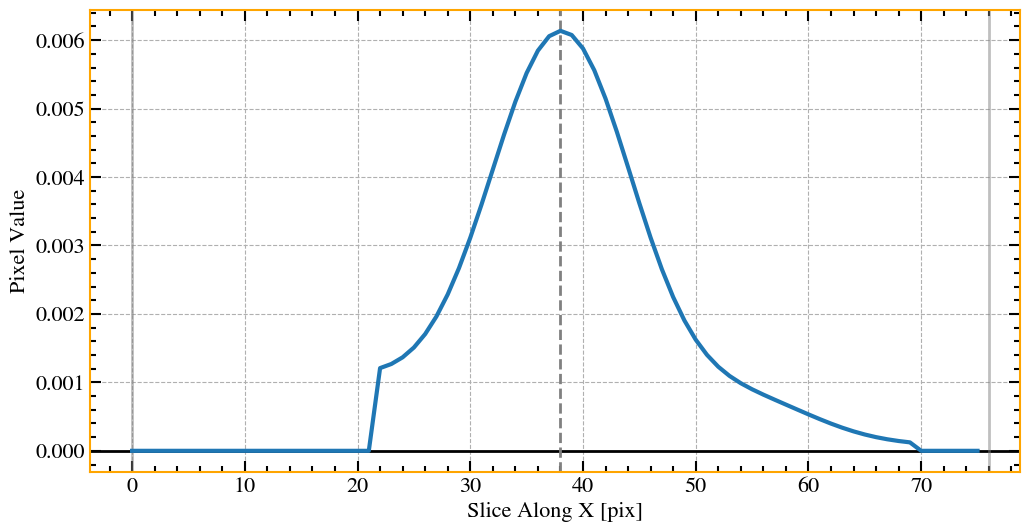

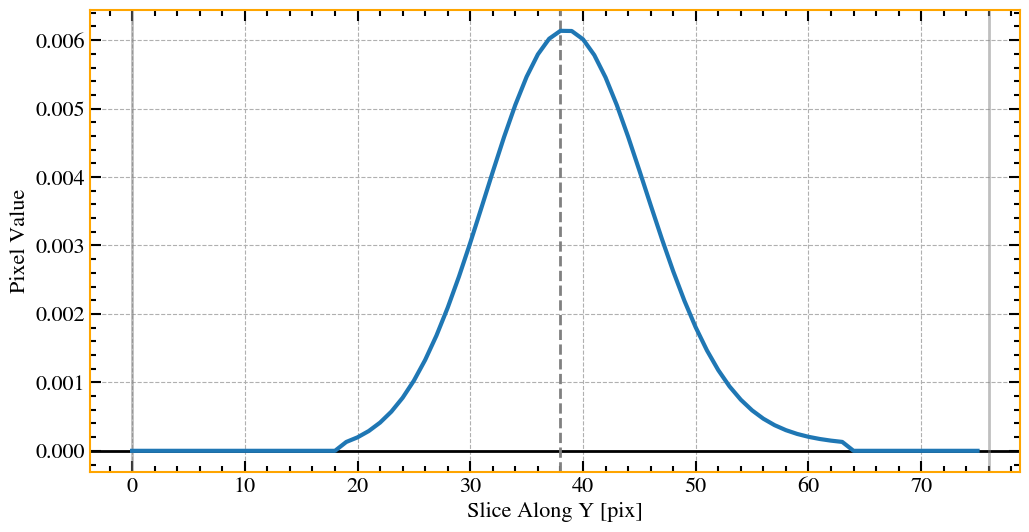

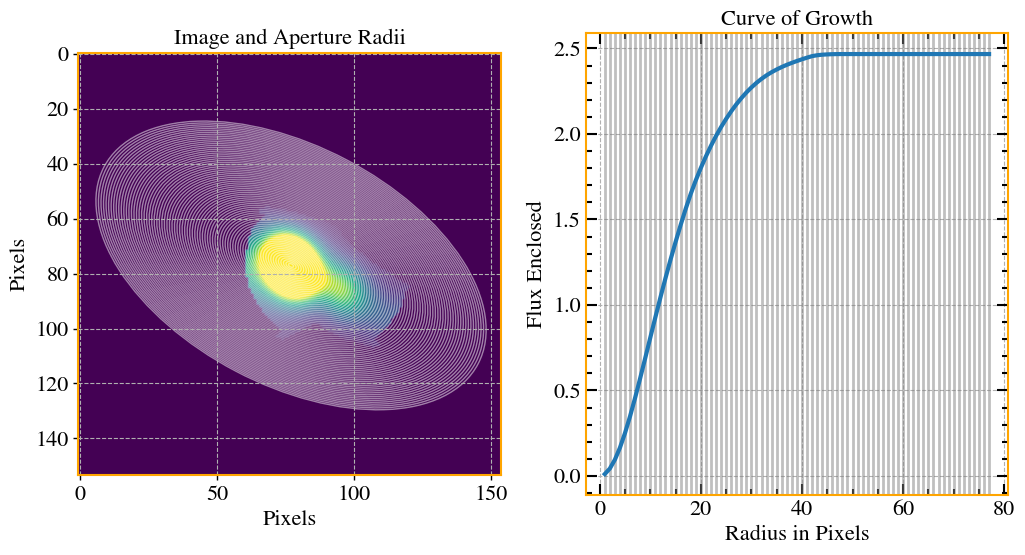

eta = 0.2
epsilon = 2
r_half_light (old vs new) = 13.83
r_total_flux (old vs new) = 49.00
R50 =  13.83136627325465
Rp= 29.989797959591918


/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


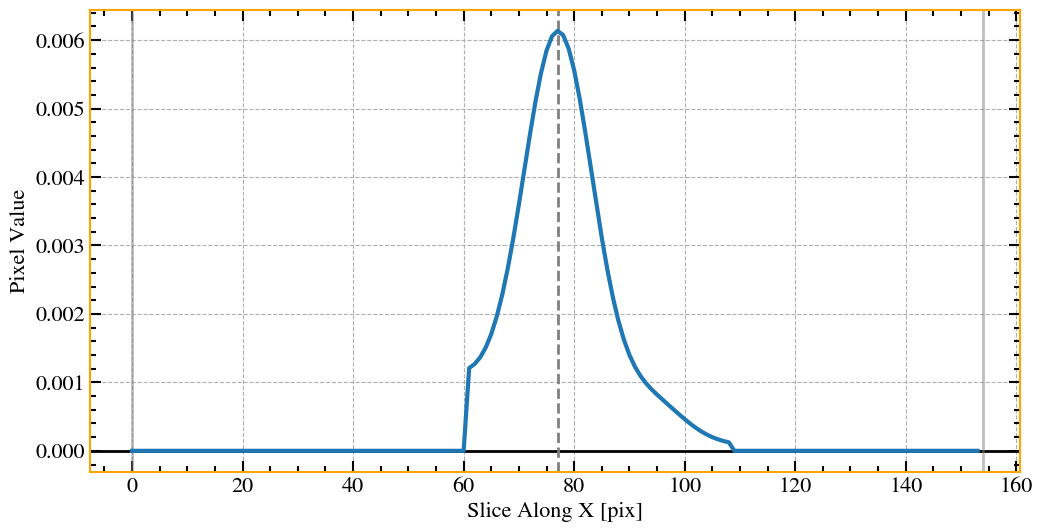

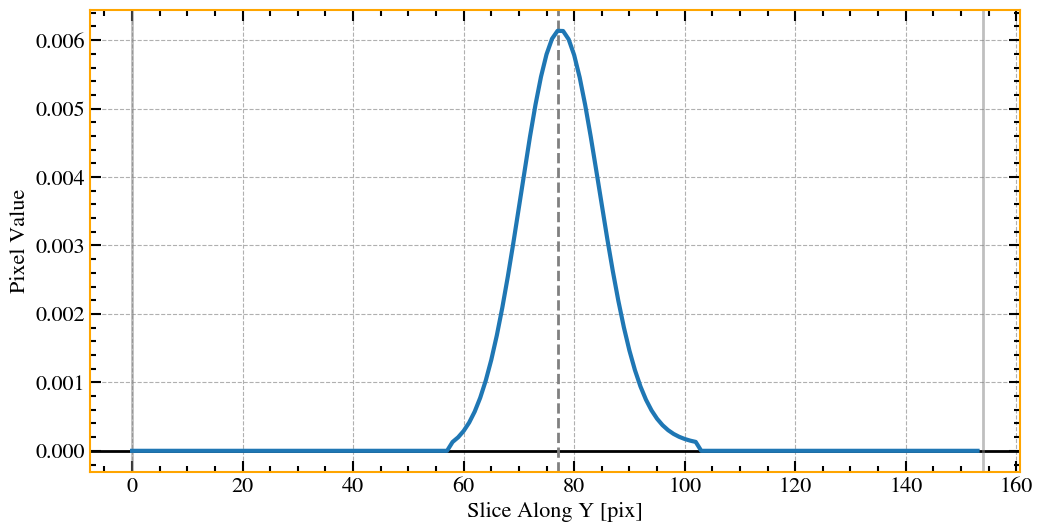

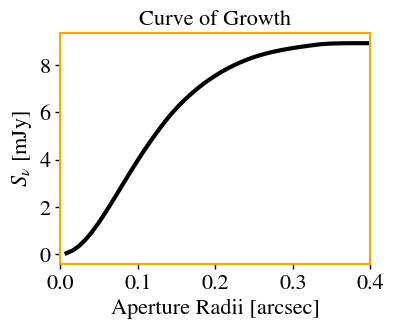

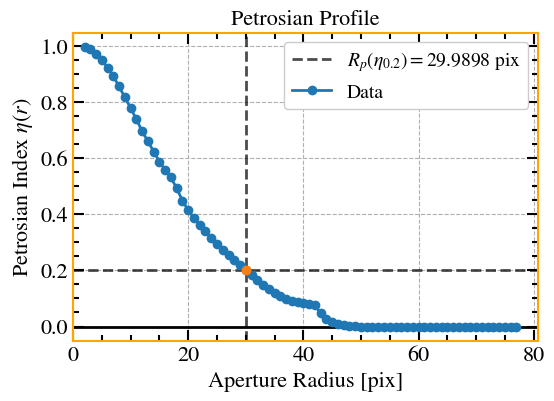

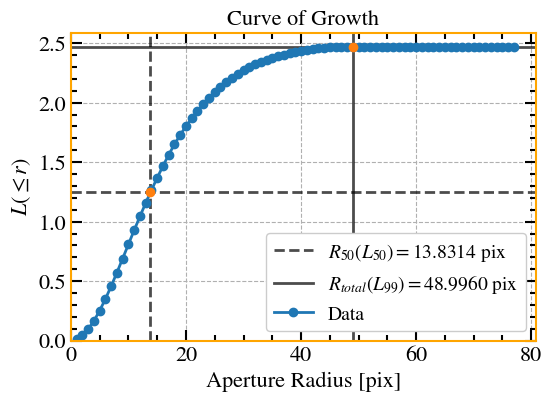

/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing image statistics...


100%|██████████| 10/10 [00:00<00:00, 44.82it/s]


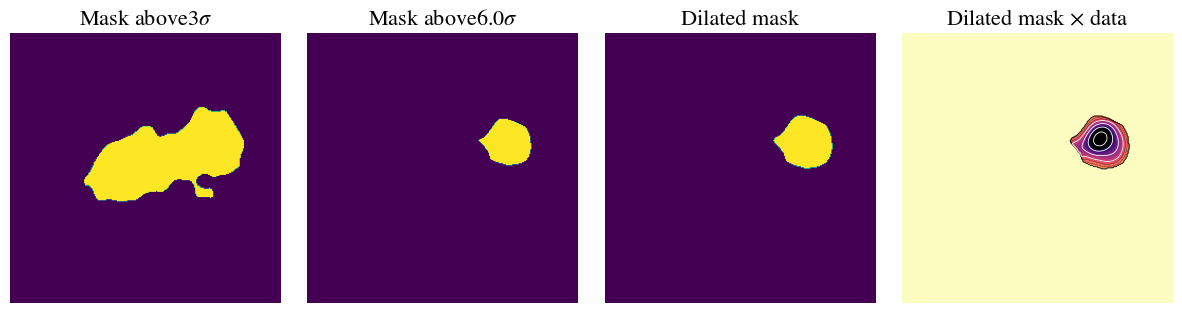

     >> CALC: Performing level statistics.
     >> CALC: Computing image properties.
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 4.64 +/- 0.03 mJy
Fractional error = 0.01
Flux Density and error (quadrature total): 
Flux Density = 4.64 +/- 0.23 mJy
Fractional error = 0.05
-----------------------------------------------------------------
32 128 96


/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:4707: RuntimeWarning: invalid value encountered in divide
  y0peak, x0peak = nd.maximum_position((image / rr2))
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:168: RuntimeWarning: Mean of empty slice.
  remove_indexes = np.where(np.logical_or(abs(y - y.mean()) >
/home/sagauga/miniconda3/envs/morphen_stable/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:169: RuntimeWarning: Mean of empty slice.
  abs(y - y.mean()).mean() * 1.5, \
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:170: RuntimeWarning: Mean of empty slice.
  abs(x - x.mean()) >
/media/sagauga/xfs_evo/cloud/On

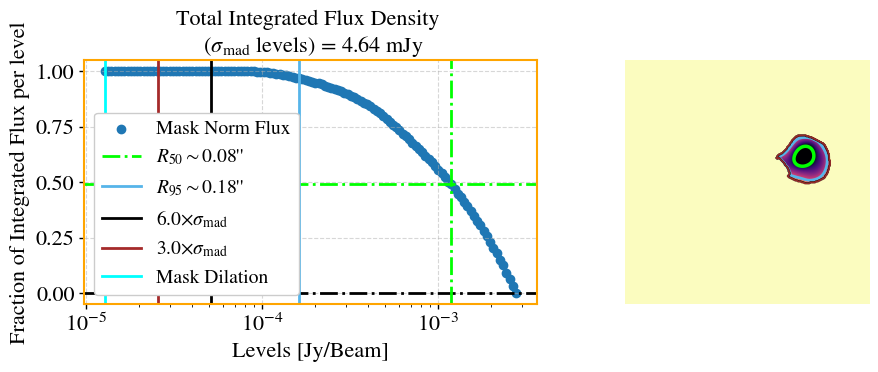

     >> CALC: Computing Petrosian properties.
1


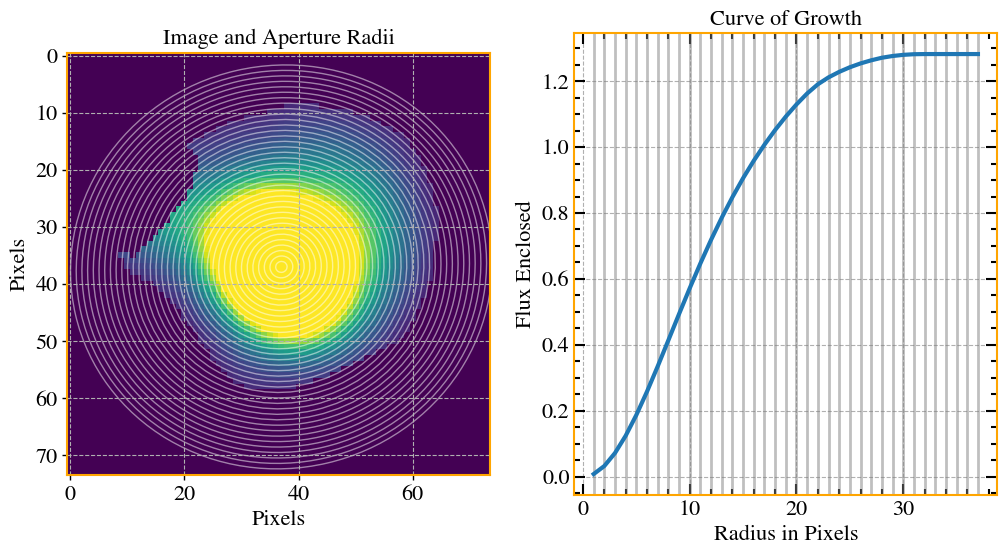

Rlast     >>  37
Rp        >>  23.070414082816566
Rtotal    >>  nan
1


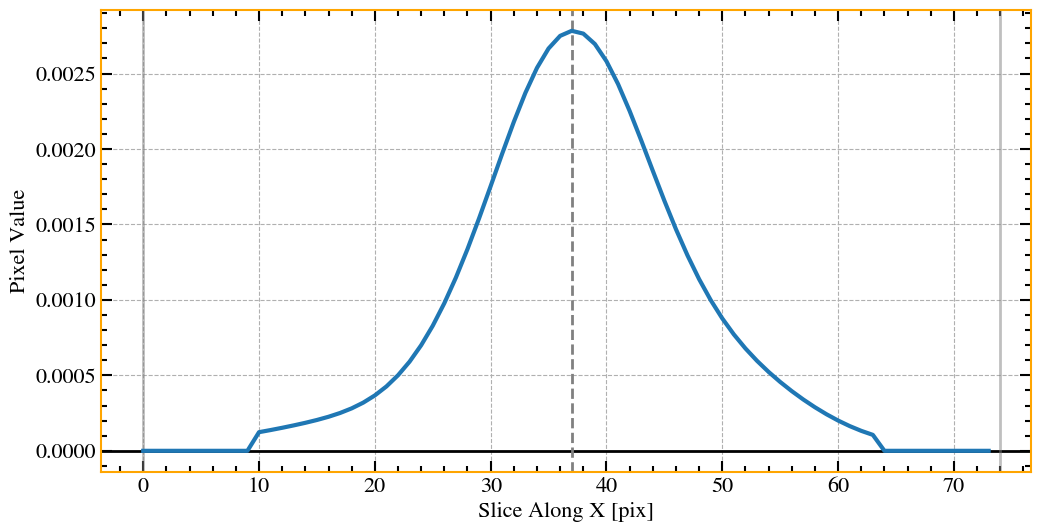

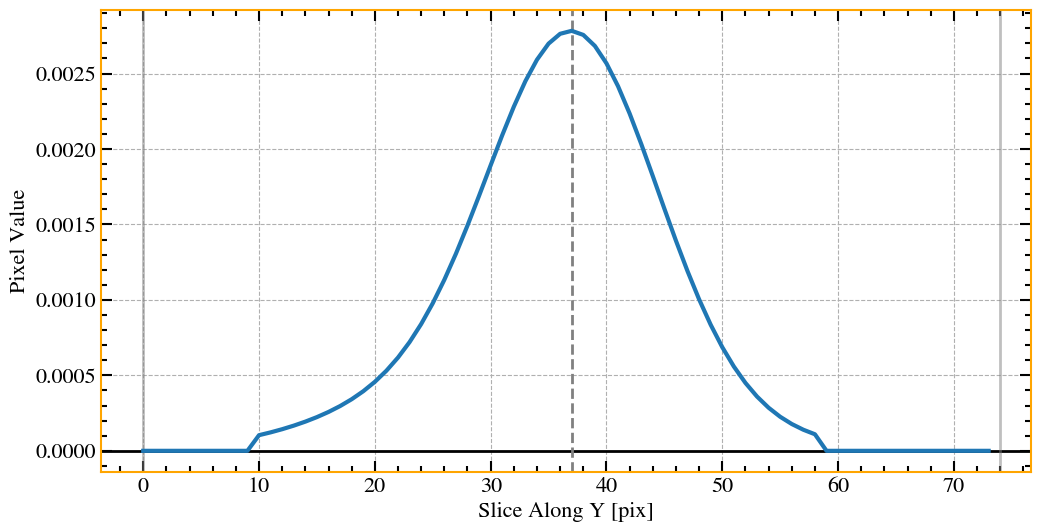

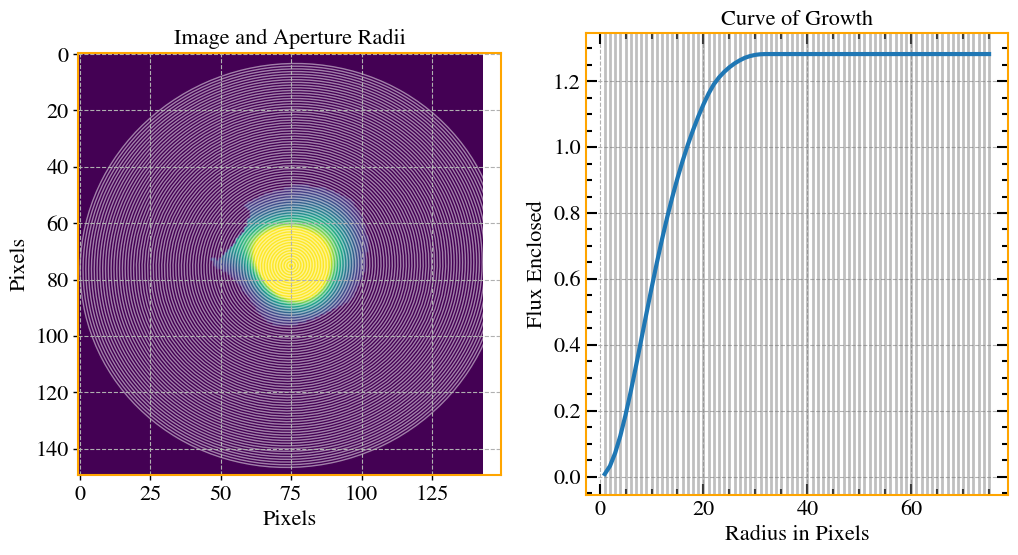

eta = 0.2
epsilon = 2
r_half_light (old vs new) = 11.01
r_total_flux (old vs new) = 32.19
R50 =  11.006801360272055
Rp= 23.074614922984598


/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


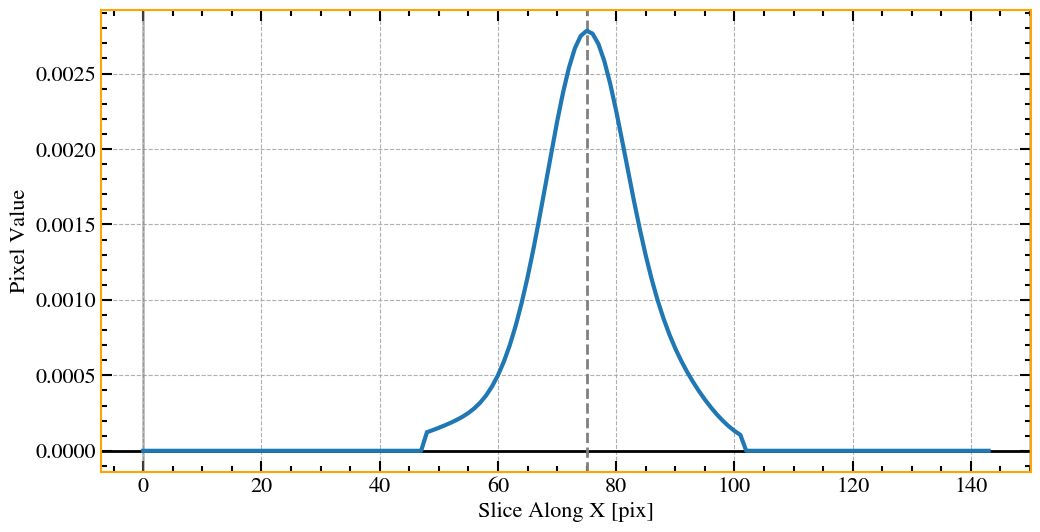

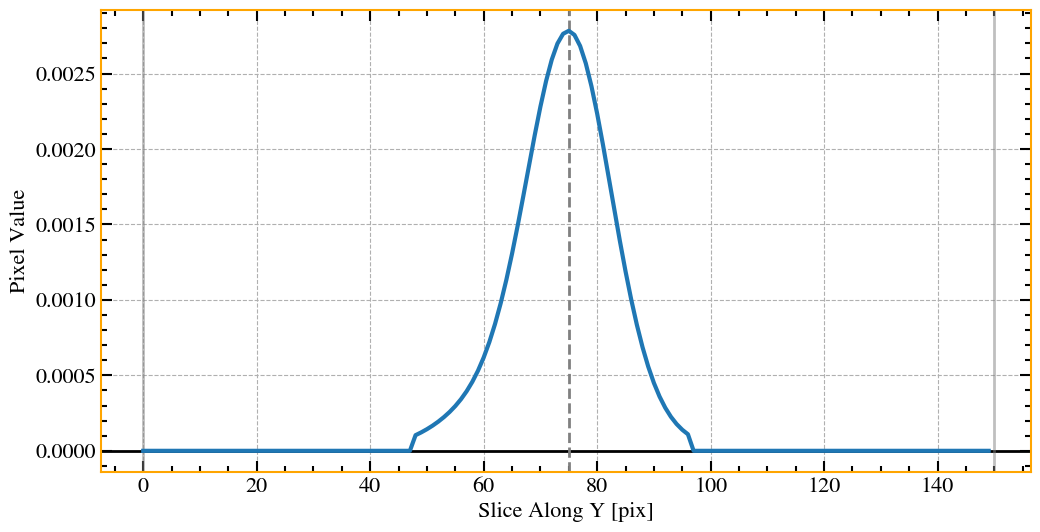

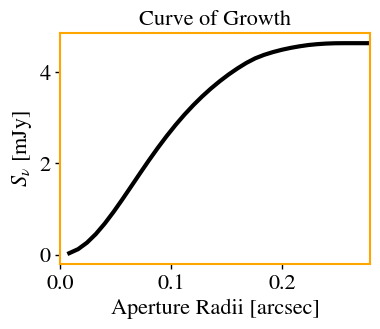

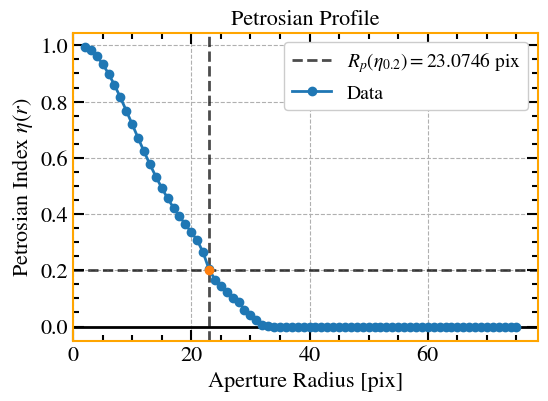

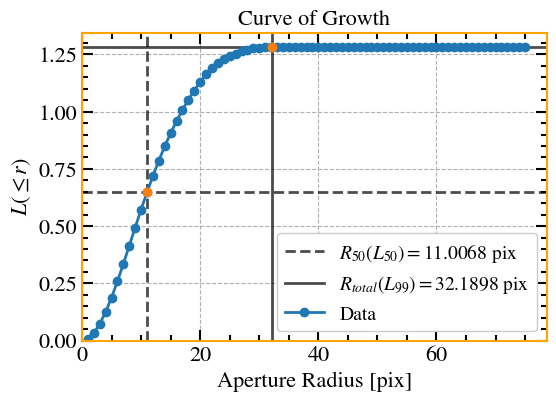

/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:2411: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing image statistics...


100%|██████████| 10/10 [00:00<00:00, 48.47it/s]


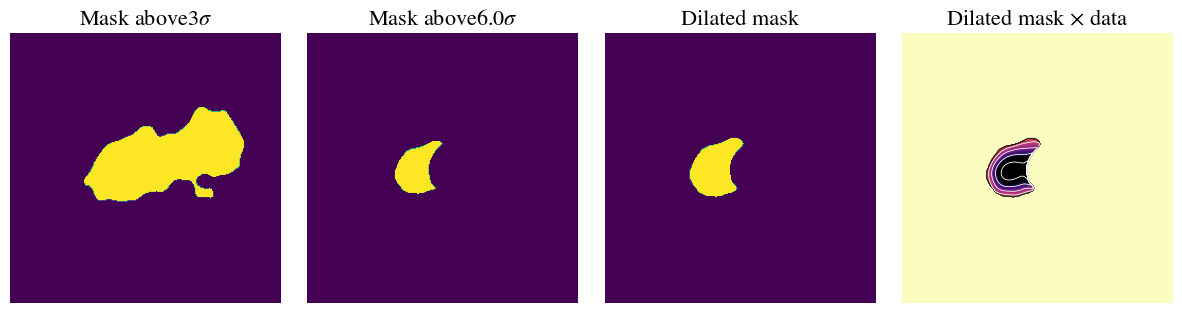

     >> CALC: Performing level statistics.
     >> CALC: Computing image properties.
-----------------------------------------------------------------
Flux Density and error (based on rms of residual x area): 
Flux Density = 3.27 +/- 0.03 mJy
Fractional error = 0.01
Flux Density and error (quadrature total): 
Flux Density = 3.27 +/- 0.17 mJy
Fractional error = 0.05
-----------------------------------------------------------------
32 128 96


/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/libs.py:4707: RuntimeWarning: invalid value encountered in divide
  y0peak, x0peak = nd.maximum_position((image / rr2))
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:168: RuntimeWarning: Mean of empty slice.
  remove_indexes = np.where(np.logical_or(abs(y - y.mean()) >
/home/sagauga/miniconda3/envs/morphen_stable/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:169: RuntimeWarning: Mean of empty slice.
  abs(y - y.mean()).mean() * 1.5, \
/media/sagauga/xfs_evo/cloud/OnedriveUoM/PhD_UoM/GitHub/morphen_dev/image_analysis/../libs/fitEllipse.py:170: RuntimeWarning: Mean of empty slice.
  abs(x - x.mean()) >
/media/sagauga/xfs_evo/cloud/On

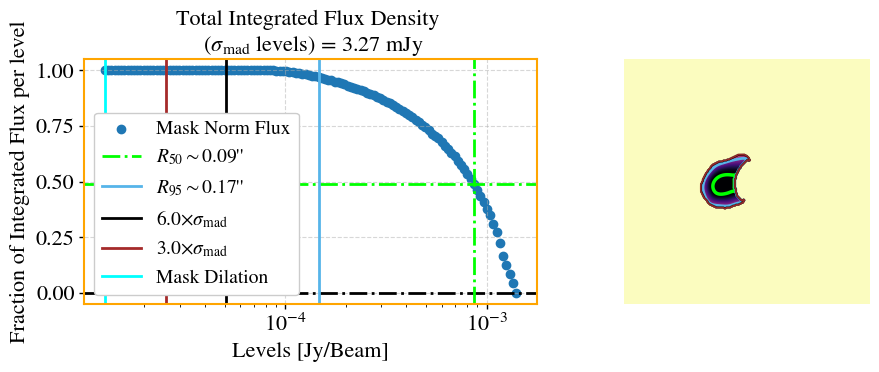

     >> CALC: Computing Petrosian properties.
1


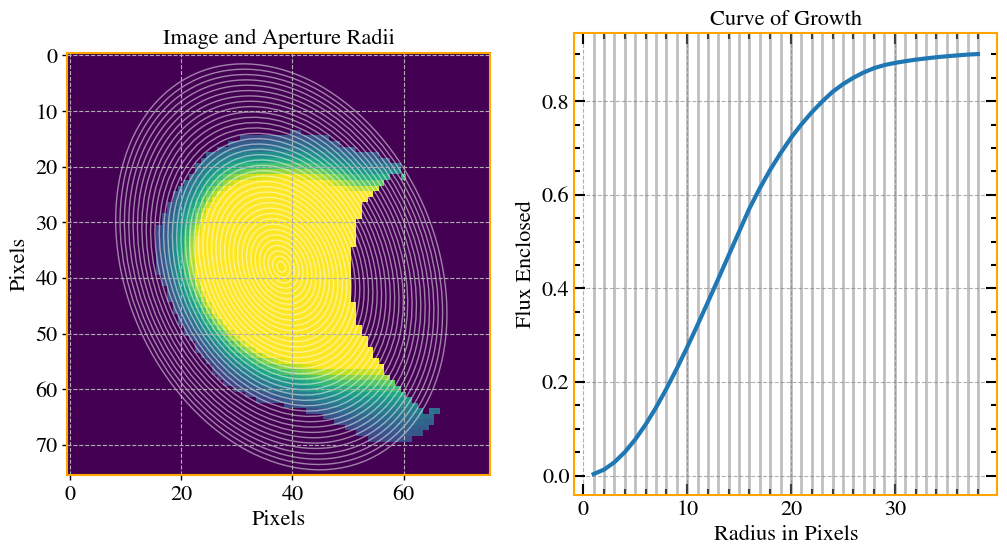

Rlast     >>  38
Rp        >>  26.445689137827564
Rtotal    >>  nan
1


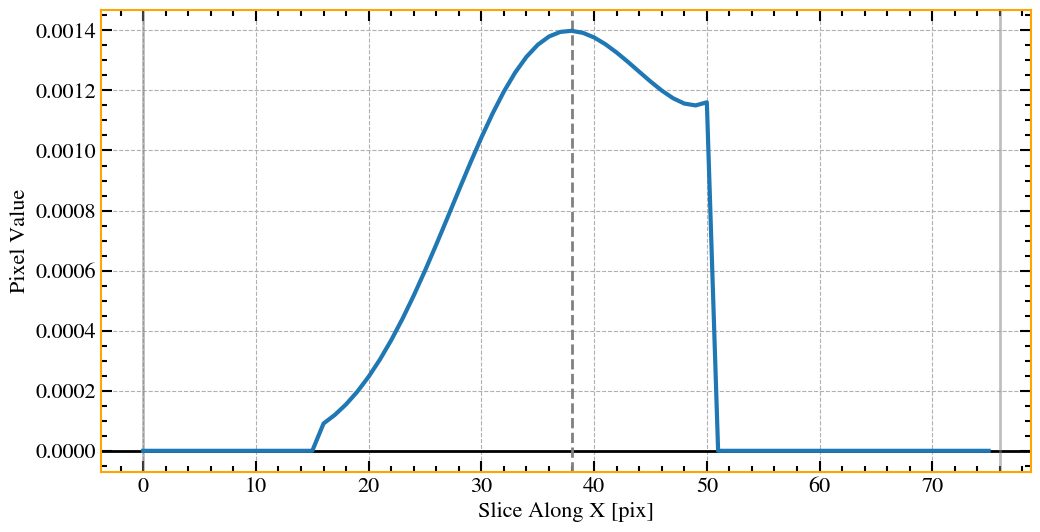

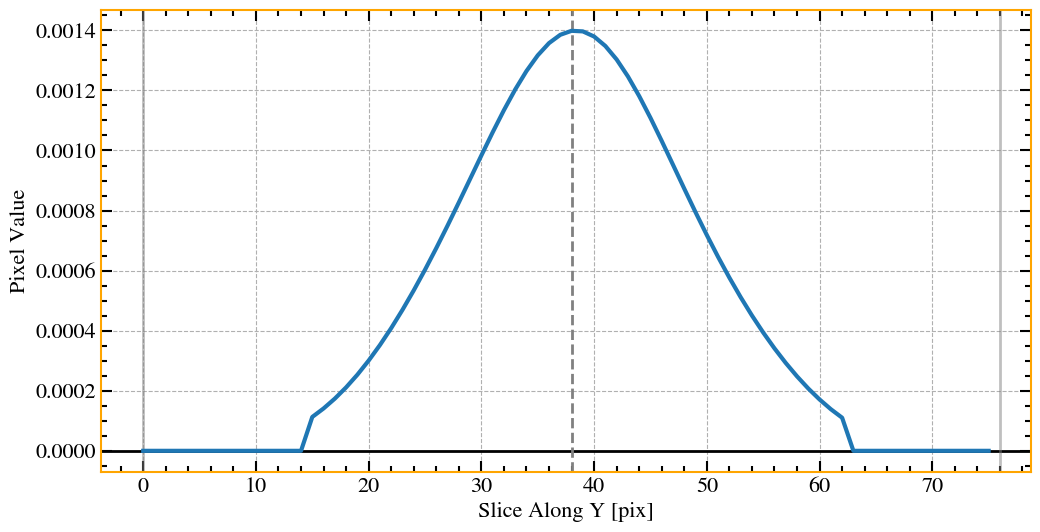

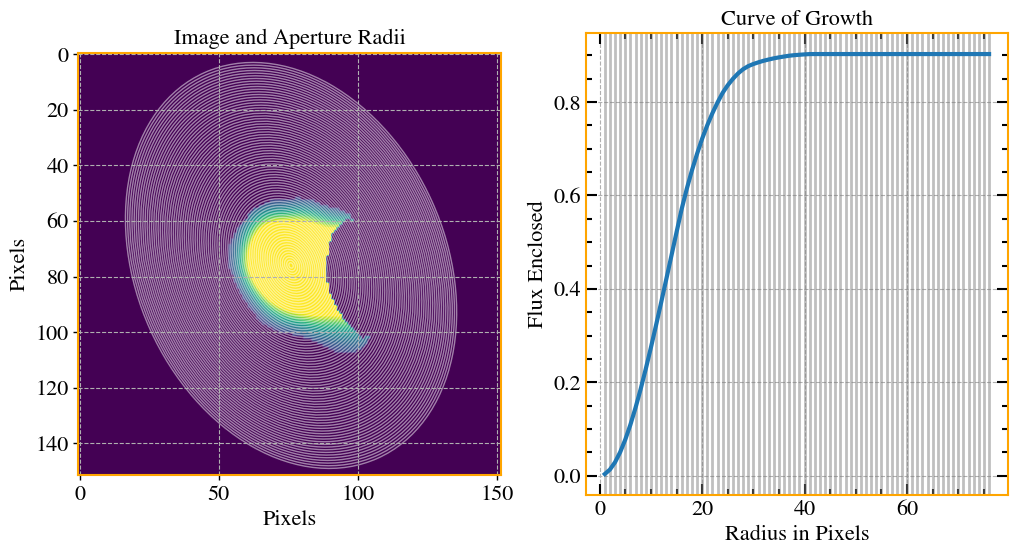

eta = 0.2
epsilon = 2
r_half_light (old vs new) = 13.71
r_total_flux (old vs new) = 41.30
R50 =  13.70754150830166
Rp= 26.453290658131625


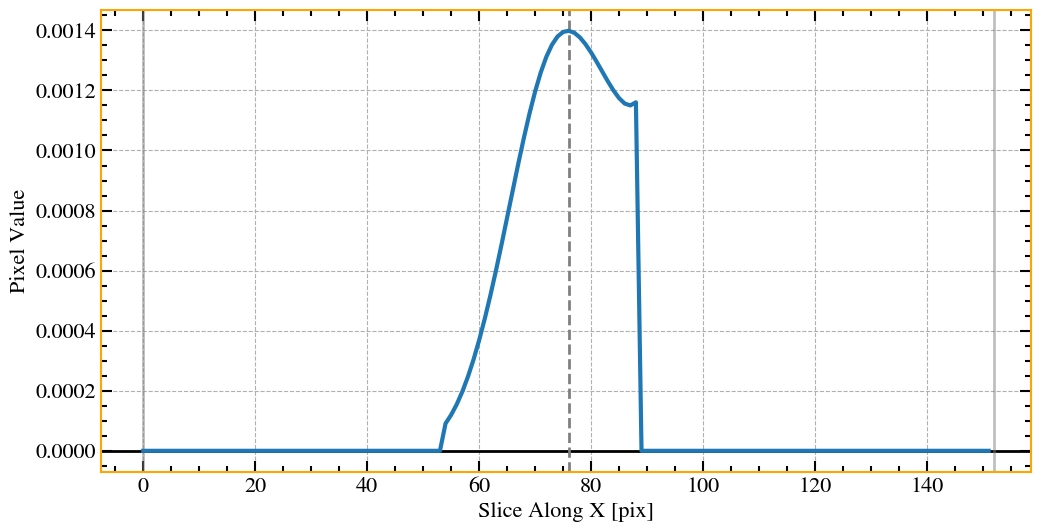

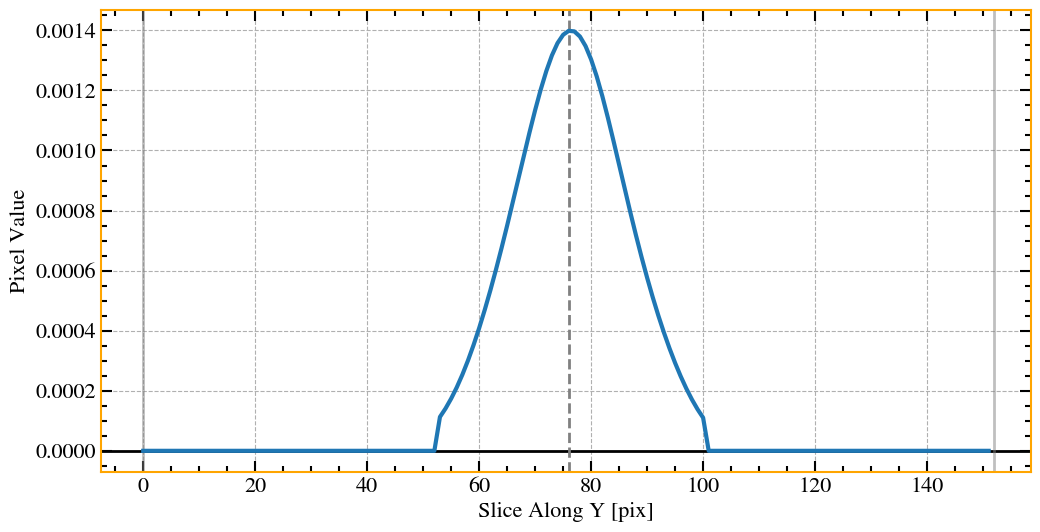

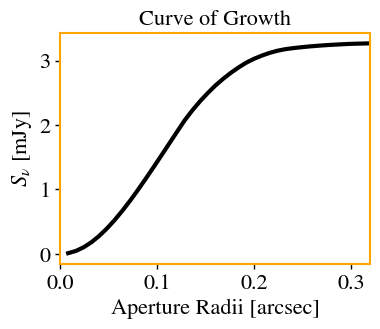

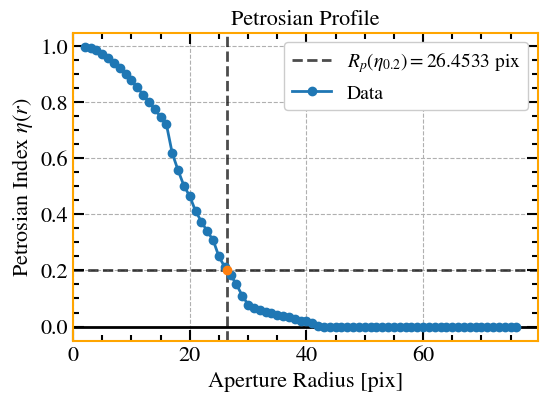

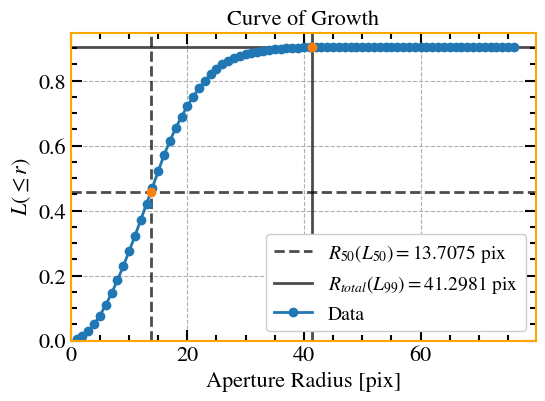

--==>> Computing image statistics...


100%|██████████| 1/1 [00:23<00:00, 23.14s/it]


In [207]:
results_conc, processing_results_source, missing_data_im = \
    mlibs.structural_morphology(imagelist = [imagelist_c[-1]], 
                                residuallist = [residuallist_c[-1]], 
                                indices=indices, 
                                masks_deblended=masks_deblended,
                                big_mask=mask,
                                zd = redshift_source)

In [208]:
df = mlibs.pd.DataFrame(results_conc)

In [209]:
df['flux_error_res_3']

0    0.000870
1    0.000447
2    0.000233
3    0.000165
Name: flux_error_res_3, dtype: float64

In [212]:
df[['total_flux_mask','flux_error_res','C50radii','C95radii']]

total_flux_mask  flux_error_res   C50radii   C95radii
0         0.017347        0.000189  16.991382  41.658439
1         0.008935        0.000047  10.060941  22.126016
2         0.004643        0.000063  10.418429  22.539356
3         0.003270        0.000074  11.227231  21.468878

In [213]:
np.sum(df[['total_flux_mask']].iloc[1:])

total_flux_mask    0.016848
dtype: float64

In the previous dataframe, `comp_ID=0` contains the information for the full structure of the source. 
The other components are the substructures, identified by the extraction/deblending algorithm.
These components are sorted by their total flux density, and the first one is the brightest one.


In [214]:
processing_results_source

{'#imagename': 'final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..0.5-MFS-image.cutout.fits',
 'comp_ID': '0',
 'peak_of_flux': 0.006136488169431686,
 'total_flux': 0.017343038764997525,
 'inner_flux': 0.01350826610122213,
 'low_flux': 0.00019647668229518498,
 'mid_flux': 0.0034068007007586024,
 'uncertain_flux': 0.00023149528072160714,
 'inner_flux_f': 0.7788869231201339,
 'low_flux_f': 0.011328849860597831,
 'mid_flux_f': 0.19643620399640435,
 'uncertain_flux_f': 0.013348023022863847,
 'number_of_beams': 28.220620970537958,
 'n_beams_inner': 8.705552779824618,
 'n_beams_mid': 12.149388342891678,
 'n_beams_low': 2.9585842849903132,
 'n_beams_uncertain': 8.401365411478,
 'total_flux_nomask': 0.017635881901244082,
 'total_flux_mask': 0.01734693883909224,
 'max_residual': 1.402938778483076e-05,
 'min_residual': -1.4656566236226354e-05,
 'flux_residual': 6.290655706622358e-05,
 'flux_error_res': 0.00018871967119867073,
 'flux_error_res_2'

In [215]:
df_source = mlibs.pd.DataFrame.from_dict(processing_results_source, orient='index').T

In [216]:
df_source

#imagename comp_ID peak_of_flux  \
0  final_image_nc8_NGC7674.calibrated.avg6s.RR_LL...       0     0.006136   

  total_flux inner_flux  low_flux  mid_flux uncertain_flux inner_flux_f  \
0   0.017343   0.013508  0.000196  0.003407       0.000231     0.778887   

  low_flux_f  ... positionangle arcsec_to_pc    bmaj_pc    bmin_pc  \
0   0.011329  ...    152.177955   804.509756  112.56941  89.680063   

          BA_pc pix_to_pc cell_size area_beam_2Rp area_beam_R50 ncomps  
0  11438.806532  6.436078     0.008     23.967208      5.459472      3  

[1 rows x 190 columns]

## 6. Upcoming Features
### 6.1 - Integration with PyBDSF


In [217]:
import bdsf

In [230]:
# df = pd.DataFrame({'ID': [1, 2, 1], 'x': [10, 10, 20], 'y': [10, 10, 20], 'z': [5, 6, 10]})

# define a function to aggregate rows with multiple measurements
def reduce_bdsf(df,cell_size):
    def average_rows(group):
        """
        For a PYBDSF table result (dataframe), read every duplicated 
        Source_ID and average it. 
        """
        if len(group) == 1:
            # if there's only one row in the group, return it
            return group
        else:
            # if there are multiple rows, calculate the mean of each column (except 'ID') and return a single row
            mean_values = group.drop('Source_id', axis=1).mean().to_dict()
            mean_values['Source_id'] = group['Source_id'].iloc[0]
            return mlibs.pd.DataFrame(mean_values, index=[0])
    # group by 'ID' and apply the 'average_rows' function to each group
    output_df = df.groupby('Source_id').apply(average_rows)

    # reset the index of the output dataframe
    output_df = output_df.reset_index(drop=True)
    
    # Pybdsf does not provide Maj and Min in px :(
    # So lets do it
    output_df['Maj_px'] = output_df['Maj'] * 3600/cell_size
    output_df['Min_px'] = output_df['Min'] * 3600/cell_size
    

    # display the output dataframe
    # print(output_df)
    return(output_df)

def plot_bdsf_ells(img,df,ell_size_factor=1,sort_by='flux'): 
    from matplotlib.patches import Ellipse
    from skimage.draw import ellipse
    fig, ax = mlibs.plt.subplots()
    m, s = mlibs.np.nanmean(img), mlibs.np.nanstd(img)
    im = ax.imshow(img, interpolation='nearest', cmap='gray',
                   vmin=m - s, vmax=m + s, origin='lower')

    masks_regions = []

    y, x = np.indices(img.shape[:2])
    for i in range(len(df)):
        e = Ellipse(xy=(df['Xposn'][i], df['Yposn'][i]),
                    width= ell_size_factor * df['Maj_px'][i],
                    height= ell_size_factor * df['Min_px'][i],
                    angle=df['PA'][i]+90# * (-180.) / np.pi
                   )
        print(e)
        xc = df['Xposn'][i]
        yc = df['Yposn'][i]
        a = ell_size_factor * df['Maj_px'][i]/2.35482
        b = ell_size_factor * df['Min_px'][i]/2.35482
        theta = mlibs.np.deg2rad(df['PA'][i] +90)
        # theta = df['PA'][i]#+90 / np.pi
        rx = (x - xc) * np.cos(theta) + (y - yc) * np.sin(theta)
        ry = (y - yc) * np.cos(theta) - (x - xc) * np.sin(theta)

        # print(((rx / a) ** 2 + (ry / b) ** 2))
        inside = ((rx / a) ** 2 + (ry / b) ** 2) <= 1
        mask_ell = mlibs.np.zeros_like(img)
        mask_ell[inside] = True
        e.set_facecolor('none')
        e.set_edgecolor('red')
        ax.add_artist(e)
        masks_regions.append(mask_ell)
        
    mask_areas = []
    if sort_by == 'area':
        for mask_comp in masks_regions:
            area_mask = mlibs.np.nansum(mask_comp)
            mask_areas.append(area_mask)
    if sort_by == 'flux':
        for mask_comp in masks_regions:
            area_mask = mlibs.np.nansum(mask_comp*img)
            mask_areas.append(area_mask)        
    
    mask_areas = mlibs.np.asarray(mask_areas)
    sorted_indices_desc = mlibs.np.argsort(mask_areas)[::-1]
    sorted_arr_desc = mask_areas[sorted_indices_desc]
    return(masks_regions,sorted_indices_desc)

In [219]:
# minpix_isl = int(beam_area2(crop_image))
minpix_isl = int(mlibs.beam_area2(input_data.filename)/2)
print(minpix_isl)

138


In [220]:
# image = bdsf.process_image(input_data.filename,
#                            thresh_pix=10,thresh_isl=7,rms_map=True,
#                            #rms_box=(128,10),
#                            atrous_do=True,flag_bordersize=5,
#                            thresh='hard', #'fdr', None
#                            interactive=False,do_mc_errors=True,
# #                            ncores=32,
#                            group_by_isl=True,
#                            splitisl_maxsize = minpix_isl * 5,
# #                          psf_vary_do = True,#output_all=True
#                            plot_allgaus=True,#savefits_meanim =True,savefits_residim=True,#savefits_rmsim = True,
#                            verbose_fitting=False, 
#                            plot_islands=True,
#                            group_tol = 5,#1
#                            split_isl=False,
#                            minpix_isl=minpix_isl,
#                            shapelet_do=False,
#                            adaptive_rms_box=True)

image = bdsf.process_image(input_data.filename,
                           thresh_pix=10,
                           thresh_isl=10,
                           splitisl_maxsize = minpix_isl / 5,
                           group_tol = 5,#1
                           rms_map=True,
                           atrous_do=True,
                           plot_allgaus=True,
                           plot_islands=True,
                           flag_bordersize=5,
                           interactive=False,
                           ncores=64,
                           do_mc_errors=False,
                           group_by_isl=True,
                           minpix_isl=minpix_isl,
                           shapelet_do=False,
                           adaptive_rms_box=True,
                           split_isl=True)


--> Opened '../../data_examples/data_examples_general/vla_only/NGC7674_Ku/final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..0.5-MFS-image.cutout.fits'
Image size .............................. : (256, 256) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (3.88675e-05, 3.09644e-05, 152.2) degrees
Frequency of image ...................... : 14999.500 MHz
Number of blank pixels .................. : 0 (0.0%)
Flux from sum of (non-blank) pixels ..... : 0.018 Jy
--> Calculating background rms and mean images
--> Using adaptive scaling of rms_box
Derived rms_box (box size, step size) ... : (274, 26) pixels (small scale)
Derived rms_box (box size, step size) ... : (685, 26) pixels (large scale)
--> Size of rms_box larger than 1/4 of image size
--> Using constant background rms and mean
Value of background rms ................. : 7.29e-06 Jy/beam
Value

Fitting islands with Gaussians .......... : [|] 0/1

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 1/1[-4G

stty: 'standard input': Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 7
Total flux density in model ............. : 0.017 Jy



--> Wavelet scale #1
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 7.37e-06 Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #2
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 6.71e-06 Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #3
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 5.08e-06 Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #4
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 3.39e-06 Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #5
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 2.31e-06 Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #6
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 1.57e-06 Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0



--> Wavelet scale #7
--> Calculating background rms and mean images
--> Using constant background rms
--> Using constant background mean
Value of background rms ................. : 5.78e-07 Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 0


Checking islands for overlap ............ : [] 0/0
Checking islands for overlap ............ : [] 0/0


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 0


Total flux density in model on all scales : 0.017 Jy
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 1


NOTE -- With the mouse pointer in plot window:
  Press "i" ........ : Get integrated flux densities and mean rms
                       values for the visible portion of the image
  Press "m" ........ : Change min and max scaling values
  Press "n" ........ : Show / hide island IDs
  Press "0" ........ : Reset scaling to default
  Click Gaussian ... : Print Gaussian and source IDs (zoom_rect mode, 
                       toggled with the "zoom" button and indicated in 
                       the lower right corner, must be off)
________________________________________________________________________


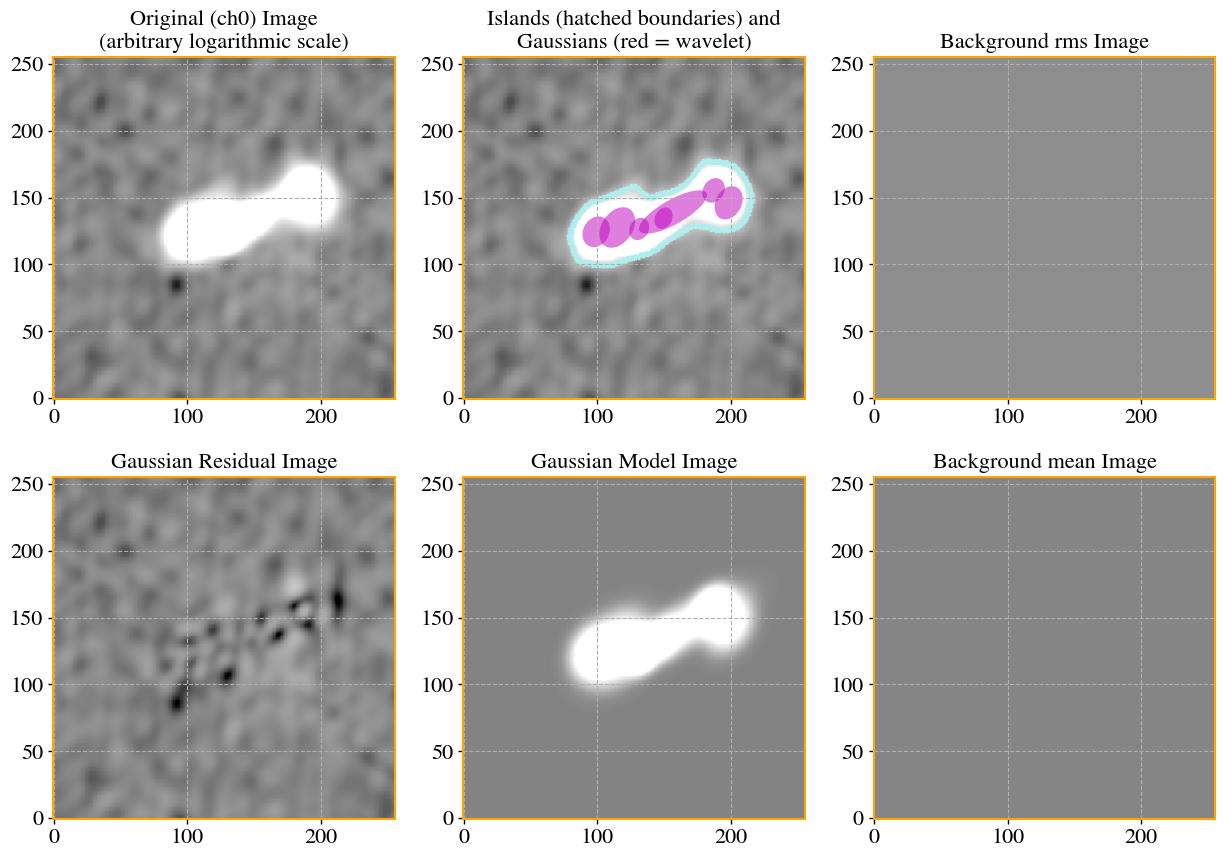

--> Wrote FITS file '../../data_examples/data_examples_general/vla_only/NGC7674_Ku/final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..0.5-MFS-image.cutouttest_cat.fits'
--> Saved parameters to file '../../data_examples/data_examples_general/vla_only/NGC7674_Ku/final_image_nc8_NGC7674.calibrated.avg6s.RR_LL_trial_1_1024x1024_0.008asec_100000.briggs.multiscale..0.5-MFS-image.cutout_bdsf_results'.


In [240]:
image.show_fit()
bdsf_cat_file = input_data.filename.replace('.fits','test_cat.fits')
image.write_catalog(format='fits', outfile=bdsf_cat_file, catalog_type='gaul',bbs_patches='single',clobber=True)
# image.write_catalog(format='fits', outfile=bdsf_cat_file, catalog_type='srl',bbs_patches='single',clobber=True)
image.save_pars(input_data.filename.replace('.fits','_bdsf_results'))

from astropy.table import Table
table_data = Table.read(bdsf_cat_file)


df = table_data.to_pandas()

# radi_ell = np.sqrt(df['Maj'] *df['Min'])
# pixel_scale = 0.008
# radius_arcsec = radi_ell * 3600
# radius_pixels = radius_arcsec / pixel_scale
# area_pixels = math.pi * radius_pixels ** 2
# print(area_pixels/area_pixels.sum())
output_df = reduce_bdsf(df,mlibs.get_cell_size(input_data.filename))

In [241]:
output_df

Gaus_id  Isl_id  Wave_id        RA          E_RA       DEC         E_DEC  \
0      3.0     0.0      0.0 -8.013748  2.296244e-07  8.778948  2.140975e-07   

   Total_flux  E_Total_flux  Peak_flux  ...  E_DC_PA_img_plane  \
0    0.002471      0.000021   0.001712  ...           1.186645   

   Isl_Total_flux  E_Isl_Total_flux   Isl_rms      Isl_mean  Resid_Isl_rms  \
0        0.017379          0.000032  0.000007  8.922468e-07       0.000016   

   Resid_Isl_mean  Source_id     Maj_px    Min_px  
0        0.000002          0  27.819997  17.51418  

[1 rows x 48 columns]

In [242]:
sorted_indices_desc

array([0])

Ellipse(xy=(148.03102289578564, 136.1897873758879), width=73.96449212851763, height=46.564614273855895, angle=235.67142484202222)


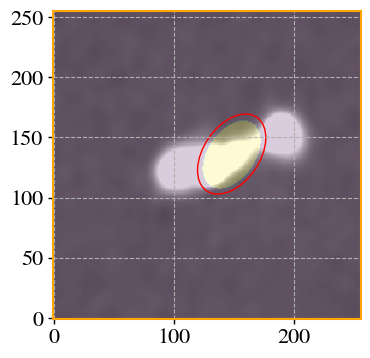

In [243]:
masks_regions,sorted_indices_desc = \
    plot_bdsf_ells(input_data.image_data_2D, 
                   output_df, 
                   ell_size_factor=1.5*np.sqrt(np.pi))
mlibs.plt.imshow(masks_regions[sorted_indices_desc[0]],origin='lower',alpha=0.2)

### 6.2 - Integration with Astrodendro

In [244]:
# sys.path.append('../../astrodendro/astrodendro/')

In [245]:
from astrodendro import Dendrogram
from astrodendro.analysis import PPStatistic
def compute_dendogram(image,imagename,min_factor=5,min_delta_factor=0.1):
    from astropy.io import fits

    from astrodendro import Dendrogram
    from astrodendro.analysis import PPStatistic

    import matplotlib.pyplot as plt
    from matplotlib.patches import Ellipse

    if isinstance(image, str) == True:
        imagedata = ctn(image)
#         hdu = fits.open(imagelist[idx])[0]
    else:
        imagedata = image

    min_value = min_factor*mad_std(imagedata)
    min_npix = beam_area2(imagename)
    d = Dendrogram.compute(imagedata, min_value=min_value, 
                           min_delta=min_value*min_delta_factor, min_npix=min_npix,verbose=False)
    p = d.plotter()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.imshow(imagedata, origin='lower', interpolation='nearest',
              cmap=plt.cm.Blues, vmax=0.0001)
    # ax=eimshow(hdu.data)
    stats = []
    ellipses = []
    for leaf in d.leaves:

        p.plot_contour(ax, structure=leaf, lw=3, colors='red')

        s = PPStatistic(leaf)
        ellipse = s.to_mpl_ellipse(edgecolor='orange', facecolor='none')
        stats.append(s)
        ellipses.append(ellipse)
        ax.add_patch(ellipse)

    # ax.set_xlim(75., 170.)
    # ax.set_ylim(120., 260.)
    # v = d.viewer()
    # v.show()
    return(d.trunk,d.leaves,stats,ellipses)


def calculate_dendograms(imagename,sigma_level=5,min_delta_factor=0.1,mask=None):
    from astropy.io import fits

    from astrodendro import Dendrogram
    from astrodendro.analysis import PPStatistic

    import matplotlib.pyplot as plt
    from matplotlib.patches import Ellipse

    hdu = pf.open(imagename)[0]
    min_npix = int(beam_area2(imagename))
    rms = sigma_level*mad_std(hdu.data)
    if mask is not None:
        min_value = 1e-5
        data_2D = hdu.data * mask
    else:
        data_2D = hdu.data
        min_value = rms
        

    d = Dendrogram.compute(data_2D, min_value=min_value, 
                           min_delta=min_value*min_delta_factor, 
                           min_npix=min_npix,verbose=False)
    p = d.plotter()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

#     ax.imshow(hdu.data, origin='lower', interpolation='nearest',
#               cmap=plt.cm.Blues,vmax=hdu.data.max()*0.01) #  vmin = 0.1*min_value ,
    ax.imshow(hdu.data, origin='lower', interpolation='nearest',
              cmap=plt.cm.Blues,vmax=hdu.data.max()*0.01) #  vmin = 0.1*min_value ,

    # ax=eimshow(hdu.data)
    for leaf in d.leaves:

        p.plot_contour(ax, structure=leaf, lw=3, colors='red')

        s = PPStatistic(leaf)
        ellipse = s.to_mpl_ellipse(edgecolor='orange', facecolor='none')

        ax.add_patch(ellipse)

    # ax.set_xlim(75., 170.)
    # ax.set_ylim(120., 260.)
    # v = d.viewer()
    # v.show()
    return(d)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
d_t,d_l,d_s,d_e = compute_dendogram(input_data.image_data_2D,
                                    input_data.filename,
                                    min_factor=3,min_delta_factor=0.01)

In [ ]:
dendos = calculate_dendograms(input_data.filename,mask=None,sigma_level=1,min_delta_factor=0.001)